In [200]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import gensim
import nltk
# nltk.download('punkt')
import string
import csv
from nltk.corpus import stopwords
# nltk.download('stopwords')
from collections import OrderedDict
from sklearn.feature_extraction.text import CountVectorizer

import networkx as nx
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource
import random

In [201]:
df=pd.read_csv('full_page_image_lucida_test.csv')
sp_df = pd.read_csv('split_page_image_lucida_test.csv', encoding='utf-8')
ao_df = pd.read_csv('Arab_Observer_Split_Page_1960_issues.csv', encoding='utf-8')
order_df = pd.read_csv('ordered_text_image_lucida_test.csv', encoding="ISO-8859-1")
order_df.fillna(0, inplace=True)

In [4]:
nlp = spacy.load('en_core_web_lg')

In [3]:
aug_14_1960 = pd.read_csv('aug_14_1960.csv', encoding='utf-8')
for index, row in aug_14_1960.iterrows():
    print(row.page_number, row.google_vision_text)
    f = open('aug_14_1960_'+str(row.page_number)+'.txt', 'wt')
    f.write(row.google_vision_text)

2  ARAB OBSERVER
INDEX
Vol. 1- No, 8
August 14, 1960
THE ARAB WORLD
- Arab Unity Enhanced by Danger
– New Libya
«ARAB OBSERVER»
is published weekly
U.A.R. AFFAIRS
-- Towards Better Relations with Turkey
-- Development on Scientific Lines
- Agricultural Mission to the U.S.A.
Editor-in-Chief
MAHMOUD AMR
13
Publisher:
Middle East Research
Centre
POLITICAL ROUNDUP
- Security Council Resolution
- Belgium Exerts Pressure
- Laos in the East and Cuba in the West
- Third Bloc
17
Distributed by :
The National Publications
House,
30, Sharia Mansour, Cairo
Price in the U.A.R.: PT, 5
THE AFRICAN CONTINENT
- Triumph of Peace
Annual Subscription: L.E. 3
20
ECONOMY
Central Bank Established to Regulate
Banking Business
- Normal conditions in Cotton Trade Restored
- Canal Improvements
COVER STORY
26
New Libya
page 7
PRESS AND RADIO OPINION
- False Argument
- Israel and Suez Canal
-- Katanga
- Belgium's Responsibility
- Financial Concerns
 
0  The Weekly Middle East News Magazine s
As ja 7. Arab Observer

In [191]:
# new_df = order_df.groupby(['page'])['google_vision_text'].apply(','.join).reset_index()
# new_df.to_csv('page_gv_text.csv')
new_df = order_df
doc = []
final_doc = []
types = ['NORP']
def custom_tokenize(text):
    if not text:
#         print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return nltk.word_tokenize(text)

for index, row in new_df.iterrows():
#     print(row)
    raw_text = row['google_vision_text']
#     print(raw_text, row['page'])
    tokens = custom_tokenize(raw_text)
    page_terms = ''
    for t in tokens:
        if t in string.punctuation:
            pass
        elif t in stopwords.words('english'):
            pass
        else:
            page_terms += t.lower() + ' '
    doc.append(page_terms)

for sent in doc:
    sent_terms = ''
    spacy_text = nlp(sent)
    print(sent)
    for ent in spacy_text.ents:
        if ent.label_ in types:
            sent_terms += ent.text + ' '
    print(sent_terms)
    final_doc.append(sent_terms)
print(final_doc)
# #     tokenized_sentences.append(sent_token)
# #     text = ''
# #     for item in tokenized_sentences:
# #         print(item)
# #         text2 = ' '.join(item)
# #         text += text2 + ' '
# #     print(sentences)

whole week egyp onl amit a you see egypt one week anywhere else ten cairo least expensive capital world 

sydney boeing via perth every monday direct flight-convenient departure arrival timings experienced crew indian hospitality air india in association b.o.a.c qantas cairo 1 sh talaat harb ex-soliman tel 318731 alex 20 rue toussoun tel van over 30 years of flying experience sep/aii/260 

the illustrated information and documentation monthly omnibus ol scribe o the scribe od schreiber oei eriba ol scriba elba editorial offices tiba 30 ramses st. cairo reviews local regional internat developments all fields activity 

from editor the whole world lost champion peace murder president kennedy but world also lost courageous fighter causes believed right during war showed remarkable endurance tenacity saving lives fellow sailors pacific recently chief executive country showed equal tenacity even toughest opposition the world laments kennedy part world laments different reason the arab world

3 representation workers board directors 4 uniformity wages arab foreign workers long work giving priority arab la- bour fill vacant posts 5 com- panies organise training cour- ses prepare arab workers fill posts held foreigners 6 con- ditions work social security arab states stand- ardised most recommendations especially third item approved conference says ali sayid ali secretary general arab federation petroleum workers cour moral vic- 
arab arab 
tories result first positive participation arab workers represented federation ali sayid ali elected general secretary afpw based cairo last october term four years when anwar salama predecessor appointed mi- nister labour uar secretary general sayid ali became responsible carrying re- solutions conference executive council objectives these objectives mainly deal industrial relations mem- ber organisations securing better standard living social justice arab workers the federation limited techni- cal service aspires national objectives well 

underfeeding two hundred seventy-four cases reported 1962 found rest comfort brooke the hospital supported vol untary contributions started 1934 english- woman mrs. brooke refuge old war horses fallen bad times shafts mrs. brooke died 1955 memory affectionately pre- served egypt one chief concerns bring ne- cessary buy -- animals past hcip they good rest good 1ood cases first time iives humanely destroyed this policy still con- tinued ao corres- pondent visited hospital dr. murad raghib veterinary director showed two poor old horses end road stand- ing good deep litter obvious- iy grateful care taken dr. murad took 40 re- porter see lively new-born foal whose mother brough tetanus the foal safely delivered tetanus cured next visiting-list several motor-accident cases one housed completely antiseptic stall the high standard treatment -- though obviously dotie 

brooke ambulance shoestring -- impressive when ao asked dr. muret could always afford drugs needed hospital shook head rather s

thought winnings saady would return triuna baghdad president aref iraqi army valuable breats ing-space bring tag army units north surround capital by early hours monday november 18 national guard hopeless position fortunately knew surrendered arms without fight army completely determined destroy national guard organisation ever valuable lessons what lessons learned nine months baathise power iraq first dvutta president nasser 's description party fascist must surely removed hitler 's boest thousand-year reich finds echoes statements they begun talk openly theit party power time åè government appointing ministers either party members i independent subordinate party policy the second lesson competent thet advocates include number western journalists would world believe freedom-loving democratie skilful politicians well in politics popular folk- lowing un scrupulous machiavellian the baathists merely unscrupulous a new era it denied te moval baath effective power iraq left dangerou vacuum

the two governments concerned furnished committee's report moroccan foreign minister ahmed reda gucdira led 17-man delegation addis talks algerian abdel aziz bouteflika led country 's 20- man delegation on arrival bouteflika declared could see reason debating frontier question if african border lines artificial said nevertheless evident stability continent rests today lines questioned.åè he declared despite fight- ing broke october 8 border changed 
moroccan african 
emperor haile selassie ethiopia chief negotiator bamako talks brought cease-fire algeria mo- rocco opened addis meeting åçany misunderstanding arises among brotherly members or- ganisation must essentially consider- ed family affair foreign hand allowed play role whatsoever he added delegates met together repel threat african unity failure could deal crippling blow winning objective marked ourselves.åè the conference got business quickly 
african 


bouteflika second left advisers ... 

guedira declared morocco would compl



south africa åè said offers gold mine comparatively near ma ambique atomic tests america scientists cleveland would su vise project the ghanaian delegate uk condemned nato powers couraging portugal 's stubborness 15 fusing african freedom the attitude portugal said åçpivots natoûòportugal agtes ment nato supplies arms.åè congo brazzaville 's ambassador u.n. accused portugal mass murder africans suppressing african freedom movement åçthis action said e analogous similar acts carried patriots various european countries nazi germany world war ii.åè åçwomen dying children massacred defenceless refugees e machine-gunned protested philippine ambassador ernest calin gasan said would press nato redouble efforts persuade por tugal abandon overseas policy he also wanted presence u.n offices throughout portugal 's african territories calingasan warned portugal surging spirit nationalism sweep ing across african continent the logical step advised would consider recognise demands africans still 

dr. t.m sonneborn indiana u.s.a. reported national academy sciences he said injecting genetic material one kind cell another experimenters forced treated cell take new occupation the change per- manent injected cell passing new pattern activity subsequent generations sonneborn experimented non-genetic ways changing cell function found work all suggests future pos- sible practical applications said knowledge turn genes effect cellular differentiations promises tremendous medical uses already researchers managed make one kind cell stop sort work turn projects they set tumour cells example manufacturing products normally produced liver cells this may answer incur able liver cirrhosis diseases clue future cure cancer 

arto textile designs from egyptian history the egyptian textile in- dustry relies heavily choice designs for- eign taste fashions apart pha- raonic motifs ignores great wealth pat- terns contained egypt's past such opinion mr. khamis shehata di- rector design sec- tion artis

al-akkad yussef al-sebai 

rhythm poetry characteristics ordinary speech poetry separated life since part parcel life fifth festival this fifth festival arabic poetry organised council the festival be- come annual event almost uqas modern arabia uqas regular feature pre-islamic arabia hun- dreds poets flocked mec- ca recite poems mostly impromptu it regarded poetic arena poets could show virtuosity often witnessed great poetic duels the new idea conceiv- ed poetry committee one many specialised professional committees high council arts literature the first three fest- ivals held damascus time union since secession become regular annual feature alex- andria to delight al- exandrians event prov- ed successful useful it successful shows people still value poetry useful helps alex- andria revive ancient literary past difficult translate it would difficult men- tion poems recited festival it would even difficult translated they mostly emotional realistic political historical humorous the po

ancient baalbek run spirit dodge city tal viewing-facilities clients lines unprogressive old s.s. borough bungaloid do-it-yout soleilville famous visitors when conducted tour mr. harding produces fascinating list travellers impressions ruins sixteenth century present day martin baum- barten arrived 1508 pierre belon forty years later followed century century jean de la rocque henry maund rell dr. pocoche robert wood draftsman dawkins sieur de volney burkhardt david roberts alphonse de lamartine dr. carne lady hester stanhope comparable c. g- anonymous english lady writes extracts journal syria 1868 åçnot forgetting nice little spirito lamp apparatus mak- ing tea preserves sardines biscuits hard eggs etc. dear considerate mrs. b. kindly provided us i equipped cool summer riding-habit brown holland i made leghorn two years ago purposefully holy land light leghorn hat broad brim yard two white muslin wound long ends protect head neck sun thus deliciously attired exclaimed åçwell indeed on

In [193]:
count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(final_doc)
# print(X)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
#
# Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
# vocab = []
# Xc.eliminate_zeros()
# linked = Xc.tolil()
# keys = Xc.todok()
# print(type(keys))
vocab = count_model.vocabulary_
vocab2 = {y:x for x,y in vocab.items()}
G = nx.from_scipy_sparse_matrix(Xc)
print(G.nodes, G.edges)
H = nx.relabel_nodes(G, vocab2)
data = json_graph.node_link_data(H)
print(data)
T = json_graph.node_link_graph(data)
print(T.nodes, T.edges)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] [(0, 3), (0, 2), (0, 12), (0, 28), (0, 30), (0, 1), (0, 22), (0, 10), (0, 26), (0, 4), (0, 0), (1, 3), (1, 2), (1, 12), (1, 28), (1, 30), (1, 1), (2, 3), (2, 30), (2, 12), (2, 28), (2, 2), (3, 30), (3, 12), (3, 28), (3, 8), (3, 35), (3, 4), (3, 29), (3, 16), (3, 21), (3, 20), (3, 3), (4, 25), (4, 7), (4, 5), (4, 35), (4, 19), (4, 20), (4, 8), (4, 29), (4, 13), (4, 4), (4, 6), (4, 17), (5, 5), (6, 32), (6, 20), (6, 8), (6, 29), (6, 13), (6, 6), (6, 17), (7, 7), (8, 35), (8, 20), (8, 8), (9, 23), (9, 31), (9, 24), (9, 34), (9, 14), (9, 9), (10, 10), (11, 11), (11, 18), (12, 30), (12, 12), (12, 28), (13, 29), (13, 13), (14, 23), (14, 31), (14, 24), (14, 34), (14, 14), (15, 23), (15, 33), (15, 15), (16, 29), (16, 21), (16, 16), (17, 17), (18, 18), (19, 20), (19, 35), (19, 19), (20, 35), (20, 21), (20, 20), (21, 29), (21, 21), (22, 22), (23, 31), (23, 24), (

In [50]:
T.edges(data=True)

EdgeDataView([('260', 'perth', {'weight': 1}), ('260', 'india', {'weight': 1}), ('260', 'aii', {'weight': 1}), ('260', '260', {'weight': 0}), ('ababa', 'african', {'weight': 10}), ('ababa', 'ababa', {'weight': 0}), ('ababa', 'moroccan', {'weight': 2}), ('ababa', 'ahmed', {'weight': 2}), ('ababa', 'reda', {'weight': 2}), ('ababa', 'algeria', {'weight': 2}), ('ababa', 'rocco', {'weight': 2}), ('abbas', 'arab', {'weight': 2}), ('abbas', 'al', {'weight': 2}), ('abbas', 'abbas', {'weight': 0}), ('abbas', 'mahmoud', {'weight': 1}), ('abbas', 'el', {'weight': 1}), ('abbas', 'akkad', {'weight': 2}), ('abdul', 'arab', {'weight': 9}), ('abdul', 'esso', {'weight': 1}), ('abdul', 'london', {'weight': 1}), ('abdul', 'york', {'weight': 1}), ('abdul', 'arabian', {'weight': 1}), ('abdul', 'abdul', {'weight': 0}), ('afghanistan', 'india', {'weight': 1}), ('afghanistan', 'palestine', {'weight': 1}), ('afghanistan', 'cairo', {'weight': 2}), ('afghanistan', 'english', {'weight': 2}), ('afghanistan', 'kurd

In [197]:
# nx.edge_betweenness_centrality(G)
ns = list(T.nodes)
es = list(T.edges)
print(ns)
final_nodes = []
for n in G.nodes:
    nod = {'name': ns[n], 'id':n}
    final_nodes.append(nod)
# print(final_nodes)
N = len(T.nodes)
counts = np.zeros((N, N))
for e in G.edges(data=True):
    source, target, w = e
    print(w)
    counts[[source], [target]] = w['weight']
    counts[[target], [source]] = w['weight']

['african', 'africans', 'algerian', 'american', 'arab', 'arabian', 'arabs', 'british', 'christian', 'english', 'ethiopian', 'germans', 'ghanaian', 'indian', 'indonesian', 'iraqi', 'israeli', 'israelis', 'italian', 'italians', 'jewish', 'jews', 'kenyan', 'kurdish', 'kurds', 'lebanese', 'moroccan', 'moroccans', 'nazi', 'palestinian', 'portuguese', 'spanish', 'swedish', 'syrian', 'turkish', 'zionist']
{'weight': 4}
{'weight': 4}
{'weight': 4}
{'weight': 4}
{'weight': 19}
{'weight': 16}
{'weight': 2}
{'weight': 5}
{'weight': 1}
{'weight': 3}
{'weight': 67}
{'weight': 2}
{'weight': 2}
{'weight': 2}
{'weight': 2}
{'weight': 12}
{'weight': 12}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 5}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 7}
{'weight': 42}
{'weight': 2}
{'weight': 1}
{'weight': 1}
{'weight': 2}
{'weight': 20}
{'weight': 32}
{'weight': 1}
{'weight': 1}
{'weight': 6}
{'weight': 4}
{'weight': 1}
{'weight': 5}
{'weight': 3}
{'weight': 2}
{'weight': 2}
{'

In [198]:
xname = []
yname = []
color = []
alpha = []
colormap = ["#444444", "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",
            "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a"]
for i, node1 in enumerate(final_nodes):
    for j, node2 in enumerate(final_nodes):
        xname.append(node1['name'])
        yname.append(node2['name'])

        alpha.append(min(counts[i,j]/4.0, 0.9) + 0.1)
print(set(alpha))
for i in range(len(xname)):
    al = alpha[i]
    if  al == 0.35:
        color.append('#ce93d8')
    elif al == 0.6:
        color.append('#ba68c8')
    elif al == 0.85:
        color.append('#9c27b0')
    elif al == 1.0:
        color.append('#7b1fa2')
    else:
        color.append('lightgrey')
print(len(color))

{0.85, 1.0, 0.6, 0.1, 0.35}
1296


In [199]:
source = ColumnDataSource(data=dict(
    xname=xname,
    yname=yname,
    colors=color,
    alphas=alpha,
    count=counts.flatten(),
))

p = figure(title="Arab Observer Occurrences",
           x_axis_location="above", tools="hover,save",
           x_range=list(reversed(ns)), y_range=ns)

p.plot_width = 1200
p.plot_height = 1200
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

p.rect('xname', 'yname', 0.9, 0.9, source=source,
       color='colors', alpha='alphas', line_color=None,
       hover_line_color='black', hover_color='colors')

p.select_one(HoverTool).tooltips = [
    ('names', '@yname, @xname'),
    ('count', '@count'),
]

output_file("arab_observer_coocurence.html", title="example")

show(p) # show the plot

In [137]:
order_text = ''.join(new_df.google_vision_text)
f = open('order_output.txt', 'wt', encoding='utf-8')
f.write(order_text)

125320

In [226]:
fp_text = ''.join(df.google_vision_text)
f = open('fp_output.txt', 'wt', encoding='utf-8')
f.write(fp_text)
type(fp_text)

str

In [93]:
sp_text = ''.join(sp_df.google_vision_text)
f = open('sp_output.txt', 'wt', encoding='utf-8')
f.write(sp_text)

132852

In [202]:



# open file and read in lines
with open('order_output.txt', 'r') as file_in:
    raw_text = file_in.readlines()
    
# take the text file and get sentences.

sentences = []
for line in raw_text:
    sentences.extend(nltk.sent_tokenize(line))

tokenized_sentences = []
for sentence in sentences:
    # tokenize each sentenceand lowercase all the tokens
#     print(sentence)
    sent_tokens = [token.lower() for token in nltk.word_tokenize(sentence) if token not in string.punctuation and token not in stopwords.words('english')]
    print(sent_tokens)
    # add the list of lowercased tokens to tokenized_sentences
    tokenized_sentences.append(sent_tokens)
# print(tokenized_sentences)

model = gensim.models.FastText(tokenized_sentences,iter=5, max_vocab_size=None)
# model =  gensim.models.Word2Vec(
#         tokenized_sentences, size=100, window=5, sg=0, alpha=0.025,
#         iter=5, max_vocab_size=None)
# # model.wv.vocab
# model.wv.most_similar(positive=['zionist'], negative=['arab'])

['whole']
['week']
[]
[]
['egyp']
['onl']
['amit', 'a']
['you', 'see', 'egypt']
['one', 'week', 'anywhere']
['else', 'ten']
['cairo', 'least', 'expensive', 'capital', 'world']
['sydney']
['boeing']
['via', 'perth']
['every', 'monday']
['direct', 'flight-convenient', 'departure', 'arrival', 'timings']
['experienced', 'crew', 'indian', 'hospitality']
['air', 'india']
['in', 'association', 'b.o.a.c']
['qantas']
['cairo', '1', 'sh']
['talaat', 'harb', 'ex-soliman', 'tel']
['318731', 'alex']
['20', 'rue', 'toussoun', 'tel']
['van']
['over', '30', 'years', 'of', 'flying', 'experience']
['sep/aii/260']
['the', 'illustrated', 'information']
['and', 'documentation']
['monthly', 'omnibus']
['ol']
['scribe']
['o', 'the', 'scribe']
['od']
['schreiber']
['oei', 'eriba']
['ol']
['scriba']
['elba']
['editorial', 'offices']
['tiba']
['30', 'ramses', 'st.', 'cairo']
['reviews', 'local', 'regional', 'internat']
['developments', 'all', 'fields', 'activity']
['from', 'editor']
['the', 'whole', 'world', 'l

['prematurely', 'heart-attack']
['count', 'bernadotte', 'swedish']
['aristocrat', 'shot']
['jerusalem', 'ha']
['prepared', 'plan', 'woun']
['accorded', 'arabs', 'que']
['tice', 'kennedy', 'within']
['days', 'coming', 'w']
['million', 'quarter', 'retur']
['gees']
['the', 'arabs', 'lama']
['friend']
['with', 'rest']
['world', 'suspect', 'story']
['put', 'dallas', 'polu']
['\x89ûó', 'add', 'suspicion']
['fear', 'know']
['motives', 'w']
['|lay', 'behind', 'killing']
['energetic', 'resolute', '\x89ûò', 'force']
['good', 'country']
['jews', 'gradually', 'intel-']
['lectual', 'honesty', 'mastered', 'in-']
['duced', 'emotions']
['israel']
['zionists', 'general']
['shocked', 'u.s.a.', 'stand']
['united', 'nations']
['rights', 'palestinian', 'refu-']
['gees']
['levi', 'eshkol', 'israeli']
['prime', 'minister', 'said', 'åçhe']
['shocked', 'pro-arab', 'at-']
['titude', 'adopted', 'american']
['delegation', 'un']
['this', 'at-']
['titude', 'adopted', 'direct']
['orders', 'president', 'kennedy']
[]


['says', 'ali', 'sayid', 'ali', 'secretary']
['general', 'arab', 'federation']
['petroleum', 'workers', 'cour', 'moral', 'vic-']
['tories', 'result']
['first', 'positive', 'participation']
['arab', 'workers', 'represented']
['federation']
['ali', 'sayid', 'ali', 'elected', 'general']
['secretary', 'afpw', 'based']
['cairo', 'last', 'october', 'term']
['four', 'years']
['when', 'anwar', 'salama']
['predecessor', 'appointed', 'mi-']
['nister', 'labour', 'uar']
['secretary', 'general', 'sayid', 'ali', 'became']
['responsible', 'carrying', 're-']
['solutions', 'conference']
['executive', 'council']
['objectives']
['these', 'objectives', 'mainly', 'deal']
['industrial', 'relations', 'mem-']
['ber', 'organisations', 'securing']
['better', 'standard', 'living', 'social']
['justice', 'arab', 'workers']
['the']
['federation', 'limited', 'techni-']
['cal', 'service', 'aspires', 'national']
['objectives', 'well', 'uniting']
['arab', 'petroleum', 'workers', 'sup-']
['port', 'national', 'movements'

['service', 'aden', 'area', 'foreign']
['monopolies', 'elements']
['total', 'exploitation', 'workers']
['dared', 'complain', 'immediately']
['dismissed']
['this', 'punishment']
['purely', 'personal', 'hands']
['there']
['absolutely', 'social', 'care', 'meals']
['day', 'allowed']
['average', 'wage']
['å£', '6', 'per', 'month', 'worker']
['but', 'conditions', 'though', 'yet']
['satisfactory', 'greatly', 'changed']
['since', 'establishment', 'gen-']
['eral', 'syndicate', 'wages', 'risen']
['å£', '20', 'still', 'enough']
['better']
['workers', 'given', 'free']
['medical', 'attention', 'families']
[]
['most', 'workers', 'still']
['houses', 'pro-']
['ject', 'way', 'aims', 'pro-']
['viding', 'workers']
['homes']
['workers', 'obtained', 'number']
['ameliorations', 'lot']
['the', 'annual', 'holiday', 'raised']
['80', 'days', 'pay', 'instead', '7']
['a', 'worker', 'get', 'sick', 'leave']
['may', 'stretch', 'month', 'with-']
['rendering', 'liable', 'dismis-']
['sal']
['the', 'syndicate', 'also', 

['health']
['but', 'expect', 'still']
['old', 'place', 'next', 'january', 'hey']
['help', 'carry', 'big', 'scheme']
['vaccinating', 'every', 'single', 'dog']
['cairo', 'anti-rabies', 'serum', 'pro-']
['vided', 'free', 'charge', 'minis-']
['try', 'agriculture']
['the', 'arab', 'observer', 'reporter']
['honorary', 'superintendent', 'ta']
['voluntary', 'organisation', 'ex-maje']
['general', 'ahmed', 'tewfik', 'forreth']
['governor', 'red', 'sea', 'provide']
['retired']
['he', 'delighted', 'one', 'visitors', 'welsh', 'conrectie']
['saying', 'words', 'garlie']
['introduced', 'dr.', 'ahmad']
['samir', 'young', 'active', 'director']
['hospital', 'conducted']
['tour', 'premises']
['the', 'inst']
['patient', 'a0', 'intro-']
['duced', 'pretty', 'little', 'white', 'tey']
['dog', 'whose', 'mistress', 'brought']
['\x80ôaily', 'treatment']
['recovery', 'obviously', 'meant', 'great']
['deal']
['the', 'next', 'department', 'provided']
['complete', 'contrast']
['in', 'big', 'caml']
['barn', '60', 'donk

['regard', 'simple', 'soldier']
['from', 'president', 'aref']
['him-']
['self', 'revealed', 'since', 're-emerged']
['iraqi', 'scene', 'five', 'days']
['silence', 'last', 'monday', 'november', '18']
['clear', 'ful-']
['ly', 'aware', 'disastrous', 'way']
['things', 'going', 'iraq']
['short', 'time']
['february', '8th', 'revolution', 'b']
['although', 'wanted', 'resign']
['several', 'occasions', 'past']
['nine', 'months', 'decided']
['duty', 'stay', 'shield', 'army']
['actions', 'government']
['save', 'could']
['mess']
['although', 'baathiste', 'regard-']
['ed', 'obstacle', 'plans']
['would', 'dearly', 'liked', 'get']
['rid', 'never', 'dared']
['tack', 'openly']
['consequently', 'remained', 'ral-']
['iying', 'point', 'arm', 'ed']
['forces', 'fortunately', 'great', 'majo-']
['rity', 'placed', 'loyalty']
['country', 'army']
['party', 'affiliation']
['the', 'key', 'baathist', 'power', 'iraq']
['national', 'guard']
['aly', 'saleh']
['saady', 'well', 'understood', 'without']
['armed', 'wing', 

['across', 'country', 'reprints']
['articles', 'israel', 'well', 'adverse']
['publications', 'arab', 'world', 'viz']
['article', 'slavery', 'saudi', 'arabia']
['another', 'copts', 'egypt']
['third', 'colour', 'problem', 'slavery']
['arabia', 'lands', 'sent', 'regularly']
['it']
['offered', 'negro', 'students', 'fellowships']
['israeli', 'institutes', 'placed', 'pictures']
['religious', 'press', 'helped']
['various', 'israeli', 'schemes', 'gave']
['film', 'shows', 'supplied', 'material']
['detters', 'editors', 'sponsored']
['åçpen', 'pal', 'projects', 'getting', 'young']
['people', 'israel', 'correspond']
['young', 'people', 'america']
['other', 'items', 'deal', 'distribution']
['literature', 'children', "'s", 'memorial']
['forest', 'purchase', 'trees', 'israeli']
['children', "'s", 'memorial', 'forest', 'carnegie']
['endowment', 'center', 'series', 'speakers']
['programme', 'work', 'among', 'negro']
['community', 'special', 'projects']
['in', 'july', 'monthly', 'report']
['title', 'åçt

['administrative', 'expenses', 'avail-']
['able', 'use', 'israel', 'direct-']
['jon']
['the', 'chaiman', 'how', 'regard']
['funds', 'paid', 'american']
['zionist', 'council']
['they', 'sub-']
['stantial']
['mr.', 'hammer', 'yes', 'sir']
['the', 'chairman', 'do', 'call']
['administrative', 'expenses']
['azc', 'and', 'shekel', 'fund']
['mr.', 'hammer', 'the', 'funds', 'i', 'believe']
['paid', 'american', 'zionist', 'coun-']
['cil', 'regarded', 'coming', 'non-']
['uia', 'funds']
['we', 'call', 'shekel', 'funds']
['funds', 'belonged']
['jerusalem', 'agency']
['the', 'chairman', 'where', 'origin-']
['ate']
['mr.', 'hammer', 'they', 'originated']
['sources', 'outside', 'united', 'states']
['canada', 'latin', 'america']
['also', 'originated', 'united', 'states']
['zionist', 'organisations']
['the', 'unit']
['membership', 'payment', 'member-']
['ship', 'zionist', 'organisations']
['world', 'zionist', 'organisation']
['days', 'shekel', 'ancient']
['hebrew', 'coin', 'amount', 'funds']
['received

['uar', 'always']
['supported', 'algerian', 'revolution']
['would', 'continue']
['threatened', 'aggression', '119']
['quarter']
['eventually', 'four', 'days', 'arbi-']
['ration', 'committee', 'sevens', 'form']
['ed']
['it', 'composed', 'ethiopia', 'sudan']
['mali', 'ivory', 'coast', 'tanganyika', 'nigeria']
['senegal']
['and', 'morocco', 'vbe']
['throughout', 'dispute', 'proved']
['difficult', 'bring', 'conferens']
['table', 'declared', 'satisfied']
['committee', 'indeed', 'neutral']
['whether', 'morocco', 'continue']
['see', 'matters', 'light', 'arti']
['rators', 'report', 'however', 'anybody']
['guess']
['immediately', 'stake', 'almost']
['entire', 'south-western', 'corner']
['regarded', 'algerian', 'sahan']
['since', 'morocco', 'algeria', 'french-controlled', 'prior', 'indepen']
['ence', 'french', 'authorities']
['define', 'boundaries']
['precision']
['hence']
['some', 'doubt', 'one', 'cour']
['begins', 'ends']
['significantly', 'however', 'dispo']
['area', 'rich', 'iron', 'ore', 'c

['move', 'sphere', 'influence']
['south', 'africa', 'france']
['taken', 'task', 'dr.', 'eduardo', 'mondlane']
['president', 'mozambique', 'liberation']
['front', 'frelimo']
['these', 'two', 'coun-']
['tries', 'said', 'helped', 'portugal', 'oppress']
['africans']
['france', 'alleged', 'supplying']
['portugal', 'arms', 'west', 'german']
['financiers', 'investing', 'portuguese']
['companies.åè']
['south', 'africa', 'åè', 'said', 'offers']
['gold', 'mine', 'comparatively', 'near', 'ma']
['ambique', 'atomic', 'tests', 'america']
['scientists', 'cleveland', 'would', 'su']
['vise', 'project']
['the', 'ghanaian', 'delegate', 'uk']
['condemned', 'nato', 'powers']
['couraging', 'portugal', "'s", 'stubborness', '15']
['fusing', 'african', 'freedom']
['the', 'attitude', 'portugal', 'said']
['åçpivots', 'nato\x89ûòportugal', 'agtes']
['ment', 'nato', 'supplies']
['arms.åè']
['congo', 'brazzaville', "'s", 'ambassador']
['u.n.', 'accused', 'portugal', 'mass', 'murder']
['africans', 'suppressing', 'af

['field', 'chemistry', 'technologi']
['high', 'polymers', 'opened']
['way', 'whole', 'new', 'range', 'century', 'plastics']
['professor', 'ziegler', '65', 'devo-']
['ed', 'career', 'study', 'met']
['organic', 'compounds', 'develop']
['ment', 'techniques', 'controlling']
['rearrangement', 'build-up', "''"]
['molecules', 'completely']
['substances', 'produced']
['synthetis']
['detergents', 'antiknock', 'additive']
['petrol', 'two', 'produs']
['made', 'possible', 'work']
['ziegler', 'germany', 'nattu']
['italy', 'split', 'chemistry', 'p']
[]
['both', 'working', 'field', 'organic', 'molecules', 'made', 'possible', 'number']
['plastic', 'products', 'well', 'devis']
['professor', 'karl', 'ziegler']
['mixtures', 'high', 'octane', 'engine']
['tuels', 'increase', 'energy', 'produc-']
['tion', 'relieve', 'knocking']
['the', 'nobel', 'awards', 'year']
['presented', 'stockholm']
['king', 'gustave', 'adolf', 'sweden']
['december', '10']
['arab', 'academy']
['for', 'sciences']
['the', 'arab', 'acade

['mr.', 'shehata', 'created', 'large']
['number', 'designs', 'started']
['experiment', 'actual', 'textile']
['printing']
['using', 'wood']
['linoleum', 'block', 'method', 'prints']
['scarves', 'table-cloths', 'cushion']
['cases', 'silk', 'screen']
['method', 'makes', 'cloth', 'garments']
['home', 'furnishings']
['visitors', 'egypt', 'see']
['work', 'assure', 'designs']
['applied', 'egyptian', 'textiles']
['instant', 'success']
['abroad']
['at', 'recent', 'exhibition']
['egyptian', 'products', 'munich']
['germany', 'mr.', 'shehata', 'displayed']
['samples', 'work', 'great']
['success']
['he', 'also', 'hopes', 'take', 'part']
['exhibition', 'egyptian', 'handi-']
['crafts', 'tour', 'africa']
['near', 'future']
['idolotu', 'tutvutti', 'soto']
['laqqaqarlaqlarra']
['islamic', 'pattern', 'seventh', 'eighth', 'centuries']
['paded', 'climb', 'performed', 'various', 'feats']
['**not', 'either', 'falter', 'though', 'beads', 'tension']
['listened', 'everyone', "'s", 'face']
['it', 'audience']
['a

['cepts', 'ways', 'life', 'old']
['art-forms', 'inadequate']
['we']
['speak', 'rhyme']
['al-akkad', 'yussef', 'al-sebai']
['rhythm', 'poetry']
['characteristics', 'ordinary']
['speech', 'poetry']
['separated', 'life', 'since']
['part', 'parcel', 'life']
[]
['fifth', 'festival']
['this', 'fifth', 'festival']
['arabic', 'poetry', 'organised']
['council']
['the', 'festival', 'be-']
['come', 'annual', 'event', 'almost']
['uqas', 'modern', 'arabia']
['uqas', 'regular', 'feature']
['pre-islamic', 'arabia', 'hun-']
['dreds', 'poets', 'flocked', 'mec-']
['ca', 'recite', 'poems', 'mostly']
['impromptu']
['it', 'regarded']
['poetic', 'arena', 'poets']
['could', 'show', 'virtuosity']
['often', 'witnessed', 'great']
['poetic', 'duels']
['the', 'new', 'idea', 'conceiv-']
['ed', 'poetry', 'committee']
['one', 'many', 'specialised']
['professional', 'committees']
['high', 'council', 'arts']
['literature']
['the', 'first', 'three', 'fest-']
['ivals', 'held', 'damascus']
['time', 'union', 'since']
['se

['baalbek', 'plenty', 'scope']
['meditation', 'historical']
['exercises', 'begin']
['other', 'mysteries']
['but', 'involve', 'mysteries']
['no', 'one', 'knows', 'built', 'huge']
['elegant', 'structures', 'precisely']
[]
['though', 'unreliable', 'writet']
['ascribes', 'emperor', 'an']
['toninus', 'pius', 'flourished', 'ad', '130']
['emperor', "'s", 'official', 'biog']
['rapher', 'annalist', 'makes', 'mentre']
['ion', 'glorious', 'achievement']
['a']
['boast', 'come', 'us']
['antiquity', 'either', 'com']
['missioned', 'execu']
['ed', 'even', 'though', 'age', 'literate']
['undertaking', 'titanie']
['his-']
['tory', 'silent', 'issue']
['inscriptions', 'recovered', 'in-']
['conclusive']
['in', 'case']
['jong-not', 'long', 'is-after']
['completion', 'adherents', 'purer']
['religions', 'began', 'dismantle', 'tem-']
['ples']
['the', 'emperor', 'justinian']
['i', 'said', 'taken']
['red', 'granite', 'pillars', 'decorate']
['vast', 'construction', 'hagia']
['sophia', 'constantinople', 'also']
['b

['arab', 'observer']
['suez', 'canal']
['authority']
['tanker', 'tr']
['suez', 'cana']
['sailing', 'canal']
['a', 'ship', 'kan']
['62']
['arab', 'observer']
['mugh', 'canal']
['authority']
['one', 'operators']
['electronie', 'section']
['december', '2', '1963']
['suez']
['canal']
['authority']
['**', 'b']
['\x80\x902']
['åá', 'international', 'econo-']
['mic', 'news', 'researches']
['\x89ûïevents', 'features', 'and']
['views', 'as', 'well', 'as', 'effi-']
['cient', 'comtel', 'service']
['are', 'now', 'presented', 'to']
['you', 'by', 'åç', 'men', '\x89', 'õ', 'in', 'arabic']
['and', 'english', 'on', 'ticker']
['or', 'in', 'bulletin']
['up-to-minute', 'briefing']
['on', 'economic', 'issues', 'and']
['events', 'is', 'rendered', 'by']
['men', "'s", 'international']
['network', 'of', 'telecommu']
['nications', 'and', 'offices']
['and', 'by', 'efficient', 'group']
['of', 'researchers', 'and', 'eco-']
['nomists']
['be', 'happy']
['\x89ûïideal\x89û\x9d']
['curve-line']
['kitchen']
['sudan']
['

In [26]:
model.wv.most_similar(positive=['kennedy'], negative=['kruschev'], topn=50)

[('revolution', 0.42063504457473755),
 ('åçthe', 0.33579641580581665),
 ('kenya', 0.3292432427406311),
 ('section', 0.32345491647720337),
 ('federation', 0.3213214874267578),
 ('years', 0.30630648136138916),
 ('could', 0.30367225408554077),
 ('may', 0.29582181572914124),
 ('america', 0.29393965005874634),
 ('åç', 0.2934613823890686),
 ('these', 0.29219040274620056),
 ('given', 0.2909305691719055),
 ('hammer', 0.28970909118652344),
 ('ed', 0.2896629571914673),
 ('chairman', 0.2895185351371765),
 ('able', 0.28736984729766846),
 ('action', 0.28514158725738525),
 ('possible', 0.28469181060791016),
 ('led', 0.27957653999328613),
 ('see', 0.27899453043937683),
 ('year', 0.2767442464828491),
 ('the', 0.2762557566165924),
 ('american', 0.27238738536834717),
 ('million', 0.2723791003227234),
 ('soon', 0.272304892539978),
 ('project', 0.2654440402984619),
 ('nothing', 0.2640480399131775),
 ('metres', 0.26376470923423767),
 ('africans', 0.26336681842803955),
 ('africa', 0.2615543603897095),
 ('pr

In [13]:
model.wv.most_similar('kennedy', topn=100)

[('those', 0.999958336353302),
 ('turkish', 0.9999579191207886),
 ('surprise', 0.999957799911499),
 ('train', 0.9999549388885498),
 ('advantage', 0.9999544620513916),
 ('brought', 0.9999540448188782),
 ('ceremony', 0.9999538660049438),
 ('methods', 0.9999537467956543),
 ('difficulty', 0.9999525547027588),
 ('method', 0.9999517202377319),
 ('mainly', 0.9999513626098633),
 ('house', 0.999951183795929),
 ('enough', 0.9999500513076782),
 ('bought', 0.9999500513076782),
 ('more', 0.9999480247497559),
 ('merely', 0.9999478459358215),
 ('head', 0.9999474287033081),
 ('actually', 0.9999463558197021),
 ('false', 0.9999462366104126),
 ('instead', 0.999946117401123),
 ('heat', 0.9999456405639648),
 ('purpose', 0.999944269657135),
 ('motive', 0.9999442100524902),
 ('bandoeng', 0.9999440312385559),
 ('balfour', 0.9999436140060425),
 ('bridge', 0.9999428391456604),
 ('throne', 0.9999421834945679),
 ('sub-', 0.999941885471344),
 ('pave', 0.9999417066574097),
 ('wise', 0.9999411106109619),
 ('dispute'

In [173]:
new_df = ao_df['google_vision_text']
new_df.as_matrix().flatten()
ao_text = ' '.join(str(elems) for elems in new_df)
f = open('ao_output.txt', 'wt', encoding='utf-8')
f.write(ao_text)

1622082

In [56]:
nlp = spacy.load('en_core_web_lg')


In [57]:
doc_fp = nlp(fp_text)
doc_sp = nlp(sp_text)
doc_order = nlp(order_text)

In [198]:
# [print(word.vector) for word in doc if word.text=='Kennedy']
doc_ao = nlp(ao_text)

In [217]:
wordVecs1 = []
for word in doc_ao:
    if word.text =='colonialism':
        wordVecs1.append(word)
        break
wordVecs1

[colonialism]

In [224]:
wordVecs1 = []
for word in doc_ao:
    if word.text == 'colonialism':
#         print(word.text)
        for word2 in doc_ao[:5000]:
            if word2.is_stop == False:
                if word.similarity(word2) > 0.7:
                    print(word.similarity(word2), word2.text, word2.has_vector, word2.vector_norm, word2.is_oov)
                    wordVecs1.append(word2)

0.7006253 nationalism True 7.5541997 False
0.8629499 imperialism True 7.257934 False
0.7006253 nationalism True 7.5541997 False
0.7006253 nationalism True 7.5541997 False
0.8629499 imperialism True 7.257934 False
0.7006253 nationalism True 7.5541997 False
0.7006253 nationalism True 7.5541997 False
0.8629499 imperialism True 7.257934 False
0.7006253 nationalism True 7.5541997 False
0.7006253 nationalism True 7.5541997 False
0.8629499 imperialism True 7.257934 False
0.7006253 nationalism True 7.5541997 False
0.7006253 nationalism True 7.5541997 False
0.8629499 imperialism True 7.257934 False
0.7006253 nationalism True 7.5541997 False
0.7006253 nationalism True 7.5541997 False
0.8629499 imperialism True 7.257934 False
0.7006253 nationalism True 7.5541997 False
0.7006253 nationalism True 7.5541997 False
0.8629499 imperialism True 7.257934 False
0.7006253 nationalism True 7.5541997 False
0.7006253 nationalism True 7.5541997 False
0.8629499 imperialism True 7.257934 False
0.7006253 nationali

In [196]:
wordVecs_fp = []
for word in doc_fp:
    if word.text == 'colonialism':
        for word2 in doc_fp:
            if word2.is_stop == False:
                if word.similarity(word2) > 0.3:
                    print(word.similarity(word2), word2.text, word2.has_vector, word2.vector_norm, word2.is_oov)
                    wordVecs_fp.append(word2)

0.41075292 POLITICAL True 7.126683 False
0.35355845 REFUGEES True 7.3143907 False
0.42045853 war True 6.890236 False
0.35313037 Arabs True 7.500925 False
0.30533582 Palestinian True 7.091634 False
0.35355848 Refugees True 7.3143907 False
0.35313037 Arabs True 7.500925 False
0.43532404 overt True 6.191252 False
0.3861817 Zionist True 7.3919716 False
0.35313037 Arabs True 7.500925 False
0.35313037 Arabs True 7.500925 False
0.44137445 nationalist True 7.670835 False
0.31284505 radical True 7.0290895 False
0.3304742 Africa True 6.7487316 False
0.3585293 Palestine True 7.051076 False
0.35355848 refugees True 7.3143907 False
0.35313037 Arabs True 7.500925 False
0.3585293 Palestine True 7.051076 False
0.35313037 Arabs True 7.500925 False
0.4097122 history True 5.927518 False
0.4097122 history True 5.927518 False
0.33198297 ruthless True 6.719414 False
0.32161045 Sharia True 7.3770733 False
0.35355848 refugees True 7.3143907 False
0.450069 segregation True 6.967466 False
0.3145345 policies Tru

0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.32016316 taxation True 6.9282074 False
0.3861817 Zionist True 7.3919716 False
0.3585293 Palestine True 7.051076 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.32016316 taxation True 6.9282074 False
0.32016316 taxation True 6.9282074 False
0.3861817 Zionist True 7.3919716 False
0.32016316 taxation True 6.9282074 False
0.32821998 epoch True 6.283066 False
0.33216524 Systematic True 6.534926 False
0.3585293 Palestine True 7.051076 False
0.30667442 Orientalists True 7.5097146 False
0.31331092 savage True 6.368416 False
0.41075292 political True 7.126683 False
0.30476087 deeply True 6.1825576 False
0.4097122 history True 5.927518 False
0.30461904 African True 6.7136106 False
0.35313037 Arabs True 7.500925 False
0.3304742 Africa True 6.7487316 False
0.30461904

0.36192334 Literature True 6.489155 False
0.3100035 modernists True 6.951625 False
0.4348446 Society True 6.60828 False
0.3755514 inflicted True 6.351773 False
0.42045853 war True 6.890236 False
0.34614074 countries True 7.216479 False
0.44137445 nationalist True 7.670835 False
0.5492258 modernism True 6.795613 False
0.4348446 Society True 6.60828 False
0.39659253 ideals True 6.770121 False
0.39757195 century True 6.7782445 False
0.30533582 Palestinian True 7.091634 False
0.30178723 peasant True 7.0909634 False
0.36192334 Literature True 6.489155 False
0.3843635 secession True 7.2276845 False
0.3266944 literary True 6.964483 False
0.41075292 political True 7.126683 False
0.3487897 historical True 6.8290696 False
0.3585293 Palestine True 7.051076 False
0.35355848 refugees True 7.3143907 False
0.31633297 nostalgia True 6.3700824 False
0.5531027 Socialism True 7.441222 False
0.42691675 Religion True 7.1487226 False
0.30533582 Palestinian True 7.091634 False
0.30972192 humanist True 7.2888

0.31223235 Agriculture True 7.1433353 False
0.40343013 economic True 7.0918612 False
0.30461904 African True 6.7136106 False
0.44666848 continent True 6.2446747 False
0.44666848 continent True 6.2446747 False
0.31223235 Agriculture True 7.1433353 False
0.3339719 Foreign True 6.6654596 False
0.3339719 Foreign True 6.6654596 False
0.3052533 emerged True 5.370277 False
0.3289773 disastrous True 5.8881903 False
0.43826717 Revolution True 6.3537593 False
0.35542324 appalling True 5.9937987 False
0.30777475 understood True 5.4048057 False
0.41075292 political True 7.126683 False
0.44435552 intellectuals True 7.080075 False
0.31962094 Unity True 6.9202456 False
0.41075292 political True 7.126683 False
0.43826717 revolution True 6.3537593 False
0.40706727 peoples True 6.6872835 False
0.3339719 foreign True 6.6654596 False
0.3947659 tyrants True 7.174195 False
0.31962094 unity True 6.9202456 False
0.43826717 revolution True 6.3537593 False
0.32326984 nation True 6.5287275 False
0.49077898 twent

0.3304742 Africa True 6.7487316 False
0.35230705 warring True 6.39893 False
0.4586403 centuries True 7.1050878 False
0.38522285 homeland True 6.2319617 False
0.30396026 movements True 7.0572505 False
0.36192334 Literature True 6.489155 False
0.3100035 modernists True 6.951625 False
0.4348446 Society True 6.60828 False
0.3755514 inflicted True 6.351773 False
0.42045853 war True 6.890236 False
0.34614074 countries True 7.216479 False
0.44137445 nationalist True 7.670835 False
0.5492258 modernism True 6.795613 False
0.4348446 Society True 6.60828 False
0.39659253 ideals True 6.770121 False
0.39757195 century True 6.7782445 False
0.30533582 Palestinian True 7.091634 False
0.30178723 peasant True 7.0909634 False
0.36192334 Literature True 6.489155 False
0.3843635 secession True 7.2276845 False
0.3266944 literary True 6.964483 False
0.41075292 political True 7.126683 False
0.3487897 historical True 6.8290696 False
0.3585293 Palestine True 7.051076 False
0.35355848 refugees True 7.3143907 Fal

In [61]:
wordVecs_sp = []
for word in doc_sp:
    if word.text == 'colonialism':
        for word2 in doc_sp:
            if word2.is_stop == False:
                if word.similarity(word2) > 0.3:
                    print(word.similarity(word2), word2.text, word2.has_vector, word2.vector_norm, word2.is_oov)
                    wordVecs_sp.append(word2)

0.41075292 POLITICAL True 7.126683 False
0.35355845 REFUGEES True 7.3143907 False
0.42045853 war True 6.890236 False
0.35313037 Arabs True 7.500925 False
0.30533582 Palestinian True 7.091634 False
0.35355848 Refugees True 7.3143907 False
0.35313037 Arabs True 7.500925 False
0.43532404 overt True 6.191252 False
0.3861817 Zionist True 7.3919716 False
0.35313037 Arabs True 7.500925 False
0.35313037 Arabs True 7.500925 False
0.44137445 nationalist True 7.670835 False
0.31284505 radical True 7.0290895 False
0.3304742 Africa True 6.7487316 False
0.3585293 Palestine True 7.051076 False
0.35355848 refugees True 7.3143907 False
0.3758256 Zionists True 7.2904663 False
0.35313037 Arabs True 7.500925 False
0.3585293 Palestine True 7.051076 False
0.35313037 Arabs True 7.500925 False
0.4097122 history True 5.927518 False
0.4097122 history True 5.927518 False
0.33198297 ruthless True 6.719414 False
0.32161045 Sharia True 7.3770733 False
0.38081908 context True 5.8952613 False
0.3145345 policies True 

0.36192334 literature True 6.489155 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.6642971 slavery True 7.4222493 False
0.3861817 Zionist True 7.3919716 False
0.3585293 Palestine True 7.051076 False
0.33191454 identity True 6.433184 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.39226508 Relations True 6.4741464 False
0.3585293 Palestine True 7.051076 False
0.3861817 Zionist True 7.3919716 False
0.3339719 Foreign True 6.6654596 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3585293 Palestine True 7.051076 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.32016316 taxation True 6.9282074 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3585293 Pal

0.39659253 ideals True 6.770121 False
0.39757195 century True 6.7782445 False
0.30972192 humanist True 7.2888527 False
0.42691675 religion True 7.1487226 False
0.3328762 Philosophy True 6.532832 False
0.32085535 emphasised True 5.3044033 False
0.31962094 unity True 6.9202456 False
0.42466822 religions True 7.574948 False
0.30476087 deeply True 6.1825576 False
0.37528256 mysticism True 6.920017 False
0.35861462 mankind True 6.797528 False
0.42045853 War True 6.890236 False
0.31934476 belief True 6.1277003 False
0.4348446 Society True 6.60828 False
0.36469626 Utopia True 6.1379085 False
0.30339128 malady True 5.7790613 False
0.3228808 contemporary True 6.6100473 False
0.44435552 intellectuals True 7.080075 False
0.35861462 mankind True 6.797528 False
0.42045853 war True 6.890236 False
0.42045853 War True 6.890236 False
0.35102126 theories True 6.9435086 False
0.49077898 twentieth True 6.104847 False
0.38578573 antiquity True 6.315458 False
0.31001097 Semitic True 7.3382726 False
0.429198

0.30178723 peasant True 7.0909634 False
0.42045853 war True 6.890236 False
0.3496988 cruelty True 7.23574 False
0.30647808 persists True 5.685544 False
0.3496988 cruelty True 7.23574 False
0.34874642 enlightened True 6.2760615 False
0.43826717 Revolution True 6.3537593 False
0.4348446 Society True 6.60828 False
0.31223235 Agriculture True 7.1433353 False
0.31223235 Agriculture True 7.1433353 False
0.35611266 abolishing True 6.640718 False
0.40343013 economic True 7.0918612 False
0.30461904 African True 6.7136106 False
0.44666848 continent True 6.2446747 False
0.44666848 continent True 6.2446747 False
0.3339719 Foreign True 6.6654596 False
0.3339719 Foreign True 6.6654596 False
0.31962094 Unity True 6.9202456 False
0.41075292 political True 7.126683 False
0.43826717 revolution True 6.3537593 False
0.40706727 peoples True 6.6872835 False
0.3339719 foreign True 6.6654596 False
0.3947659 tyrants True 7.174195 False
0.31962094 unity True 6.9202456 False
0.43826717 revolution True 6.3537593 

0.4028001 Nations True 7.1281624 False
0.3304742 Africa True 6.7487316 False
0.3304742 Africa True 6.7487316 False
0.6137367 colonial True 7.282069 False
0.40731633 independence True 6.7479477 False
0.30461904 African True 6.7136106 False
0.30962023 Indians True 7.133771 False
0.42622375 Africans True 7.2093425 False
0.3304742 Africa True 6.7487316 False
0.34484357 civil True 6.7736616 False
0.3304742 Africa True 6.7487316 False
0.3339719 foreign True 6.6654596 False
0.30962023 Indians True 7.133771 False
0.42622375 Africans True 7.2093425 False
0.34614074 countries True 7.216479 False
0.30962023 Indians True 7.133771 False
0.31114176 Americans True 6.655224 False
0.35102126 theories True 6.9435086 False
0.42045853 war True 6.890236 False
0.39757195 century True 6.7782445 False
0.31223235 agriculture True 7.1433353 False
0.42725694 occupation True 6.5091367 False
0.4405819 revolutions True 7.233246 False
0.31150585 generations True 6.268951 False
0.3071703 triumphs True 6.152423 False


In [67]:
wordVecs_order = []
for word in doc_order:
    if word.text == 'colonialism':
        for word2 in doc_order:
            if word2.is_stop == False:
                if word.similarity(word2) > 0.3:
                    print(word.similarity(word2), word2.text, word2.has_vector, word2.vector_norm, word2.is_oov)
                    wordVecs_order.append(word2)

0.42045853 war True 6.890236 False
0.35313037 Arabs True 7.500925 False
0.43532404 overt True 6.191252 False
0.3861817 Zionist True 7.3919716 False
0.35313037 Arabs True 7.500925 False
0.35313037 Arabs True 7.500925 False
0.44137445 nationalist True 7.670835 False
0.31284505 radical True 7.0290895 False
0.3585293 Palestine True 7.051076 False
0.35355848 refugees True 7.3143907 False
0.3758256 Zionists True 7.2904663 False
0.35313037 Arabs True 7.500925 False
0.3585293 Palestine True 7.051076 False
0.35313037 Arabs True 7.500925 False
0.4097122 history True 5.927518 False
0.4097122 history True 5.927518 False
0.33198297 ruthless True 6.719414 False
0.35313037 Arabs True 7.500925 False
0.30533582 Palestinian True 7.091634 False
0.35355848 Refugees True 7.3143907 False
0.3304742 Africa True 6.7487316 False
0.32161045 Sharia True 7.3770733 False
0.4673501 politics True 6.768305 False
0.33609676 alienated True 6.4576693 False
0.38081908 context True 5.8952613 False
0.3145345 policies True 6

0.6642971 slavery True 7.4222493 False
0.34130278 religious True 7.3075466 False
0.36192334 literature True 6.489155 False
0.37048936 profoundly True 6.058058 False
0.33378136 implication True 5.166706 False
0.3375215 hostile True 6.394427 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3585293 Palestine True 7.051076 False
0.33191454 identity True 6.433184 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3585293 Palestine True 7.051076 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3585293 Palestine True 7.051076 False
0.3861817 Zionist True 7.3919716 False
0.39226508 Relations True 6.4741464 False
0.3339719 Foreign True 6.6654596 False
0.3861817 Zionist True 7.3919716 False
0.3861817 Zionist True 7.3919716 False
0.3861

0.4438323 cultures True 7.2707663 False
0.4586403 centuries True 7.1050878 False
0.35230705 warring True 6.39893 False
0.3933397 empire True 6.772803 False
0.52073556 conquest True 6.7670865 False
0.35313037 Arabs True 7.500925 False
0.3384827 Islam True 7.5170956 False
0.3487897 historical True 6.8290696 False
0.3429148 peasants True 7.3259954 False
0.3304742 Africa True 6.7487316 False
0.4586403 centuries True 7.1050878 False
0.30396026 movements True 7.0572505 False
0.4348446 Society True 6.60828 False
0.4348446 Society True 6.60828 False
0.42045853 war True 6.890236 False
0.3755514 inflicted True 6.351773 False
0.42045853 war True 6.890236 False
0.34614074 countries True 7.216479 False
0.44137445 nationalist True 7.670835 False
0.5492258 modernism True 6.795613 False
0.36192334 Literature True 6.489155 False
0.3100035 modernists True 6.951625 False
0.36192334 Literature True 6.489155 False
0.3843635 secession True 7.2276845 False
0.3266944 literary True 6.964483 False
0.41075292 po

0.4348446 Society True 6.60828 False
0.31223235 Agriculture True 7.1433353 False
0.40343013 economic True 7.0918612 False
0.35611266 abolishing True 6.640718 False
0.30461904 African True 6.7136106 False
0.44666848 continent True 6.2446747 False
0.44666848 continent True 6.2446747 False
0.31962094 Unity True 6.9202456 False
0.41075292 political True 7.126683 False
0.43826717 revolution True 6.3537593 False
0.40706727 peoples True 6.6872835 False
0.3339719 foreign True 6.6654596 False
0.3947659 tyrants True 7.174195 False
0.31962094 unity True 6.9202456 False
0.43826717 revolution True 6.3537593 False
0.32326984 nation True 6.5287275 False
0.49077898 twentieth True 6.104847 False
0.43617994 opportunism True 6.5944943 False
0.3129206 subversive True 6.440118 False
0.4586403 centuries True 7.1050878 False
0.44156036 struggle True 5.934407 False
0.31962094 Unity True 6.9202456 False
0.32326984 nation True 6.5287275 False
0.31962094 Unity True 6.9202456 False
0.31962094 Unity True 6.9202456

0.4097122 HISTORY True 5.927518 False
0.31177676 wealth True 6.290415 False
0.46934828 Culture True 6.839358 False
0.4438323 cultures True 7.2707663 False
0.3429148 peasants True 7.3259954 False
0.3487897 historical True 6.8290696 False
0.32838854 remnants True 6.2115917 False
0.34130278 religious True 7.3075466 False
0.35491633 era True 6.6928577 False
0.4438323 cultures True 7.2707663 False
0.4586403 centuries True 7.1050878 False
0.35230705 warring True 6.39893 False
0.3933397 empire True 6.772803 False
0.52073556 conquest True 6.7670865 False
0.35313037 Arabs True 7.500925 False
0.3384827 Islam True 7.5170956 False
0.3487897 historical True 6.8290696 False
0.3429148 peasants True 7.3259954 False
0.3304742 Africa True 6.7487316 False
0.4586403 centuries True 7.1050878 False
0.30396026 movements True 7.0572505 False
0.4348446 Society True 6.60828 False
0.4348446 Society True 6.60828 False
0.42045853 war True 6.890236 False
0.3755514 inflicted True 6.351773 False
0.42045853 war True 6

In [197]:
wordVecs_fp.sort(key = lambda x: x.vector_norm, reverse=True)
[print(word.text, word.vector_norm) for word in wordVecs_fp]

persecutions 8.263517
persecutions 8.263517
persecutions 8.263517
persecutions 8.263517
Palestinians 7.816115
Palestinians 7.816115
oppress 7.793257
oppress 7.793257
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
religions 7.574948
religions 7.574948
religions 7.574948
religions 7.574948
Socialist 7.5693145
socialist 7.5693145
Socialist 7.5693145
Socialist 7.5693145
socialist 7.5693145
Socialist 7.5693145
nationalism 7.5541997
nationalism 7.5541997
nationalism 7.5541997
nationalism 7.5541997
apartheid 7.5416837
apartheid 7.5416837
Islam 7.5170956
Islam 7.5170956
Orientalists 7.5097146
Orientalists 7.5097146
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [85]:
wordVecs_sp.sort(key = lambda x: x.vector_norm, reverse=True)
[print(word.text, word.vector_norm) for word in wordVecs_sp]

persecutions 8.263517
persecutions 8.263517
persecutions 8.263517
persecutions 8.263517
Palestinians 7.816115
Palestinians 7.816115
oppress 7.793257
oppress 7.793257
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
religions 7.574948
religions 7.574948
religions 7.574948
religions 7.574948
socialist 7.5693145
socialist 7.5693145
socialist 7.5693145
socialist 7.5693145
socialist 7.5693145
socialist 7.5693145
nationalism 7.5541997
nationalism 7.5541997
apartheid 7.5416837
apartheid 7.5416837
Islam 7.5170956
Islam 7.5170956
Orientalists 7.5097146
Orientalists 7.5097146
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [86]:
wordVecs_order.sort(key = lambda x: x.vector_norm, reverse=True)
[print(word.text, word.vector_norm) for word in wordVecs_order]

persecutions 8.263517
persecutions 8.263517
persecutions 8.263517
persecutions 8.263517
Palestinians 7.816115
Palestinians 7.816115
oppress 7.793257
oppress 7.793257
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
nationalist 7.670835
religions 7.574948
religions 7.574948
religions 7.574948
religions 7.574948
socialist 7.5693145
socialist 7.5693145
socialist 7.5693145
socialist 7.5693145
socialist 7.5693145
socialist 7.5693145
nationalism 7.5541997
nationalism 7.5541997
nationalism 7.5541997
nationalism 7.5541997
apartheid 7.5416837
apartheid 7.5416837
Islam 7.5170956
Islam 7.5170956
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7.500925
Arabs 7

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [201]:
len(wordVecs1)

0

In [10]:
[prop for prop in dir(doc[1]) if not prop.startswith('_')]

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'right_edge',
 'rights',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 'tag_',
 'text',
 'text_with_ws',
 'vector',
 'vector_norm',
 'vocab',
 'whitespace_']

In [11]:
set([w.label_ for w in doc.ents])

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [272]:
[ent for ent in doc2.ents if ent.label_ == 'GPE']

[DR,
 El Senoussi,
 Alexandria,
 Turkey,
 U.S.A.,
 Cuba,
 Israel,
 Belgium,
 Italy,
 Germany,
 Germany,
 Czechoslovakia,
 China People's Republic,
 Rcky Mount,
 FRANCE,
 A.C.E.C.,
 Belgium,
 the Egyptian Region,
 Iran,
 Israel,
 Israel,
 Israel,
 Palestine,
 the Gaza Strip,
 Palestine,
 Britain,
 Israel,
 Iran,
 Israel,
 the Shah of Iran,
 Iran,
 Israel,
 Palestine,
 Iran,
 Palestine,
 Israel,
 Israel,
 Israel,
 U.S.,
 Iran,
 USA,
 Israel,
 U.S.,
 Israel,
 the United Arab,
 Iran,
 
 Republic,
 Israel,
 Palestine,
 Iran,
 Israel,
 Israel,
 Israel,
 Iran,
 Israelied,
 Teheran,
 Libya,
 Cairo,
 Libya,
 the United Arab,
 Israel,
 Iran,
 Libya,
 Turkey,
 Iran,
 Israel,
 Israel,
 
    ,
 ARAB,
 Israel,
 Israel,
 Iran,
 Israel,
 Israel,
 Israel,
 Libya,
 Israel,
 Israel,
 Iran,
 Israel,
 Iran,
 Iran,
 Palestine,
 Israel,
 Israel,
 Palestine,
 Iran,
 Israel,
 Iran,
 Iran,
 Israel,
 Israel,
 Iran,
 Israel,
 Iran,
 Israel,
 Israel,
 Israel,
 Iran,
 Israel,
 Morocco,
 Tunisia,
 Sudan,
 Iran,
 Isr

In [141]:
docNounVecs_fp = [word.vector for word in wordVecs_fp]
docNounNormVecs_fp = [word.vector_norm for word in wordVecs_fp]
docNounLabels_fp = [word.string.strip() for word in wordVecs_fp]
lsa = TruncatedSVD(n_components=2, n_iter=10)
lsaOut = lsa.fit_transform(docNounVecs_fp)
lsaOut.shape
# %matplotlib notebook
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)):
    print(docNounLabels_fp[i], xs[i], ys[i], docNounNormVecs_fp[i])
#     plt.scatter(xs[i], ys[i])
#     plt.annotate(docNounLabels_fp[i], (xs[i], ys[i]))

HOTELS 2.333683 1.0269281 8.403023
hotels 2.3337379 1.0261391 8.403023
hotels 2.3337379 1.026122 8.403023
HOTELS 2.3337386 1.02612 8.403023
hotels 2.333738 1.0261211 8.403023
hotels 2.3337376 1.0261213 8.403023
HOTELS 2.333738 1.0261207 8.403023
hotels 2.333738 1.0261207 8.403023
hotels 2.333738 1.0261207 8.403023
HOTELS 2.333738 1.0261207 8.403023
hotels 2.333738 1.0261207 8.403023
hotels 2.333738 1.0261207 8.403023
HOTELS 2.333738 1.0261207 8.403023
hotels 2.333738 1.0261207 8.403023
hotels 2.333738 1.0261207 8.403023
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclear 2.893163 1.5349872 8.054869
nuclea

President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.7233981 7.123663
President 3.1351414 0.723

Funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
Funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.2259207 1.8618451 6.93328
funds 3.225920

career 3.0431912 1.266698 6.7980747
career 3.0431912 1.266698 6.7980747
career 3.0431912 1.266698 6.7980747
municipal 2.4758246 1.3819165 6.797792
municipal 2.4758246 1.3819165 6.797792
municipal 2.4758246 1.3819165 6.797792
municipal 2.4758246 1.3819165 6.797792
municipal 2.4758246 1.3819165 6.797792
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.793712
centre 2.6531222 0.54026437 6.7

companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937
companies 3.4073665 2.2640982 6.7256937


service 3.1983333 1.2161783 6.6337132
SERVICE 3.1983333 1.2161783 6.6337132
service 3.1983333 1.2161783 6.6337132
service 3.1983333 1.2161783 6.6337132
SERVICE 3.1983333 1.2161783 6.6337132
service 3.1983333 1.2161783 6.6337132
service 3.1983333 1.2161783 6.6337132
SERVICE 3.1983333 1.2161783 6.6337132
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
products 2.6918848 1.2467922 6.6282854
CONFERENCE 2.9934523 0.8718298 6.6279144
Conference 2.9934523 0.8718298 6.6279144
Conference 2.9934523 0.871829

organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
Organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
Organisation 2.8496745 1.7561476 6.532645
Organisation 2.8496745 1.7561476 6.532645
Organisation 2.8496745 1.7561476 6.532645
Organisation 2.8496745 1.7561476 6.532645
Organisation 2.8496745 1.7561476 6.532645
Organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6.532645
ORGANISATION 2.8496745 1.7561476 6.532645
organisation 2.8496745 1.7561476 6

National 3.4814906 1.4647858 6.4168935
national 3.4814906 1.4647858 6.4168935
national 3.4814906 1.4647858 6.4168935
national 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
NATIONAL 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
national 3.4814906 1.4647858 6.4168935
national 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
national 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
national 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647858 6.4168935
national 3.4814906 1.4647858 6.4168935
national 3.4814906 1.4647858 6.4168935
National 3.4814906 1.4647

publications 2.1401548 1.5381533 6.305189
PUBLICATIONS 2.1401548 1.5381533 6.305189
publications 2.1401548 1.5381533 6.305189
PUBLICATIONS 2.1401548 1.5381533 6.305189
publications 2.1401548 1.5381533 6.305189
PUBLICATIONS 2.1401548 1.5381533 6.305189
publications 2.1401548 1.5381533 6.305189
PUBLICATIONS 2.1401548 1.5381533 6.305189
publications 2.1401548 1.5381533 6.305189
resources 3.1003203 1.8270533 6.2951474
resources 3.1003203 1.8270533 6.2951474
resources 3.1003203 1.8270533 6.2951474
resources 3.1003203 1.8270533 6.2951474
resources 3.1003203 1.8270533 6.2951474
resources 3.1003203 1.8270533 6.2951474
resources 3.1003203 1.8270533 6.2951474
resources 3.1003203 1.8270533 6.2951474
resources 3.1003203 1.8270533 6.2951474
resources 3.1003203 1.8270533 6.2951474
meeting 3.2848134 0.73044115 6.294705
meeting 3.2848134 0.73044115 6.294705
meeting 3.2848134 0.73044115 6.294705
meeting 3.2848134 0.73044115 6.294705
meeting 3.2848134 0.73044115 6.294705
meeting 3.2848134 0.73044115 6.2

support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
SUPPORT 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
support 3.3241577 1.4533466 6.132308
SUPPORT 3.3241577 1.4533466 6.132308
s

United 2.4667978 1.7435731 5.9802823
united 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
united 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
United 2.4667978 1.7435731 5.9802823
U

lead 3.287614 0.621394 5.8373003
lead 3.287614 0.621394 5.8373003
lead 3.287614 0.621394 5.8373003
lead 3.287614 0.621394 5.8373003
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8330555
among 3.4902554 0.709493 5.8

greatest 3.1867309 0.12649749 5.757962
greatest 3.1867309 0.12649749 5.757962
greatest 3.1867309 0.12649749 5.757962
greatest 3.1867309 0.12649749 5.757962
supplying 1.9595122 0.8801355 5.7532034
supplying 1.9595122 0.8801355 5.7532034
supplying 1.9595122 0.8801355 5.7532034
supplying 1.9595122 0.8801355 5.7532034
supplying 1.9595122 0.8801355 5.7532034
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
leading 3.1290731 0.6434137 5.75295
order 3.4522042 0.57132775 5.752643
order 3.4522042 0.57132775 5.752643
order 3.4522042 0.57132775 5.752

their 4.3177414 0.3404969 5.697708
their 4.3177414 0.3404969 5.697708
their 4.3177414 0.3404969 5.697708
their 4.3177414 0.3404969 5.697708
calls 2.7043068 0.8976947 5.695754
calls 2.7043068 0.8976947 5.695754
calls 2.7043068 0.8976947 5.695754
calls 2.7043068 0.8976947 5.695754
calls 2.7043068 0.8976947 5.695754
calls 2.7043068 0.8976947 5.695754
calls 2.7043068 0.8976947 5.695754
calls 2.7043068 0.8976947 5.695754
calls 2.7043068 0.8976947 5.695754
calls 2.7043068 0.8976947 5.695754
six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776
Six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776
Six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776
Six 3.1582923 0.45754725 5.694776
six 3.1582923 0.45754725 5.694776


an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0.53656054 5.5624833
an 3.683643 -0

outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
outside 3.4345644 0.2575169 5.4554014
extraordinary 2.8847528 0.58300173 5.4546895
extraordinary 2.8847528 0.58300173 5.4546895
extraordinary 2.8847528 0.58300173 5.4546895
extraordinary 2.8847528 0.58300173 5.4546895
extraordinary 2.8847528 0.58300173 5.4546895
these 3.8490849 0.92407745 5.4537206
these 3.8490849 0.92407745 5.4537206
these 3.8490849 0.92407745 5.4537206
these 3.8490849 0.92407745 5.4537206
these 3.8490849 0.92407745 5.4537206
These 3.8490849 0.92407745 5.4537206
these 3.8490849 0.92407745 5.4537206
these 3.8490849 0.92407745 5.4537206
These 3.8490849 0.92407

General 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
GENERAL 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
general 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
General 3.3828385 1.0862025 5.413368
g

including 3.1513798 0.70744514 5.353123
including 3.1513798 0.70744514 5.353123
including 3.1513798 0.70744514 5.353123
including 3.1513798 0.70744514 5.353123
including 3.1513798 0.70744514 5.353123
including 3.1513798 0.70744514 5.353123
including 3.1513798 0.70744514 5.353123
including 3.1513798 0.70744514 5.353123
including 3.1513798 0.70744514 5.353123
including 3.1513798 0.70744514 5.353123
places 3.3165746 0.6529574 5.3421082
places 3.3165746 0.6529574 5.3421082
places 3.3165746 0.6529574 5.3421082
places 3.3165746 0.6529574 5.3421082
places 3.3165746 0.6529574 5.3421082
several 3.5759206 0.53913754 5.3417263
several 3.5759206 0.53913754 5.3417263
several 3.5759206 0.53913754 5.3417263
several 3.5759206 0.53913754 5.3417263
several 3.5759206 0.53913754 5.3417263
several 3.5759206 0.53913754 5.3417263
several 3.5759206 0.53913754 5.3417263
several 3.5759206 0.53913754 5.3417263
several 3.5759206 0.53913754 5.3417263
several 3.5759206 0.53913754 5.3417263
several 3.5759206 0.53913

we 3.813404 1.1207938 5.260865
We 3.813404 1.1207938 5.260865
we 3.813404 1.1207938 5.260865
We 3.813404 1.1207938 5.260865
We 3.813404 1.1207938 5.260865
we 3.813404 1.1207938 5.260865
We 3.813404 1.1207938 5.260865
We 3.813404 1.1207938 5.260865
We 3.813404 1.1207938 5.260865
We 3.813404 1.1207938 5.260865
We 3.813404 1.1207938 5.260865
we 3.813404 1.1207938 5.260865
we 3.813404 1.1207938 5.260865
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
How 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
How 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
How 3.72213 0.96620834 5.2509694
how 3.72213 0.96620834 5.2509694
how

ahead 3.009101 0.5410395 5.1837335
ahead 3.009101 0.5410395 5.1837335
ahead 3.009101 0.5410395 5.1837335
ahead 3.009101 0.5410395 5.1837335
ahead 3.009101 0.5410395 5.1837335
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063
set 3.0623116 0.1532121 5.176063


over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
OVER 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494413 0.18437642 5.11742
over 3.494

in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
In 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
In 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
In 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
In 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -

in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
In 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
In 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
In 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -

in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
In 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
In 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
in 3.4200296 -0.5064504 5.0929856
In 3.4200296 -0.5064504 5.0929856
in 3.4200296 -

this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
This 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
This 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
This 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
This 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
This 3.61091 0.030611657 5.0461264
This 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.030611657 5.0461264
this 3.61091 0.03061

rather 3.6702442 1.2364504 5.0297217
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.7354517 -0.14467394 5.0296216
place 3.73545

be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
Be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.8095694 1.0124452 4.9934616
be 3.80956

which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.4829638 4.9601226
which 3.867541 0.482

continues 2.8175943 0.6081401 4.9032693
continues 2.8175943 0.6081401 4.9032693
But 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
But 3.7693107 1.1512579 4.903002
But 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
But 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
But 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
But 3.7693107 1.1512579 4.903002
given 3.5312474 0.69732374 4.903002
given 3.5312474 0.69732374 4.903002
But 3.7693107 1.1512579 4.903002
But 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
But 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
given 3.5312474 0.69732374 4.903002
but 3.7693107 1.1512579 4.903002
but 3.7693107 1.1512579 4.903002
But 3.7693107 1.1512579 4.903002
But 3.7693107 1.1512579 4.903002
given 3.5312474 0.69

for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
For 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
FOR 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
For 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
f

for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
FOR 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
For 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
For 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
for 3.2174318 -0.062044322 4.8435082
f

that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
That 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
That 4.081941 0.54484236 4.8260193
That 4.081941 0.54484236 4.8260193
That 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
That 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.54484236 4.8260193
that 4.081941 0.5448

with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
With 3.2750616 0.083175264 4.7708583
With 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
With 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
with 3.2750616 0.083175264 4.7708583
w

to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
To 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.551

to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
To 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.551

to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.5519328 0.29899627 4.74484
to 3.551

the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021

the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021

The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021

The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021

the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021

the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021

the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021

the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021

THE 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
THE 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021

the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021314 -2.1647851 4.70935
The 4.1021314 -2.1647851 4.70935
the 4.1021

and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 

and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 

and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 

and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
And 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 0.4039035 4.6577983
and 3.4270184 

as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
As 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
As 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0.46730092 4.5106106
as 3.4889565 0

In [142]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(lsaOut)
xs, ys = X_tsne[:,0], X_tsne[:,1]
# %matplotlib notebook
for i in range(len(xs)): 
    print(docNounLabels_fp[i], xs[i], ys[i], docNounNormVecs_fp[i])

KeyboardInterrupt: 

In [74]:
docNounVecs_sp = [word.vector for word in wordVecs_sp]
docNounLabels_sp = [word.string.strip() for word in wordVecs_sp]
lsa = TruncatedSVD(n_components=2, n_iter=10)
lsaOut = lsa.fit_transform(docNounVecs_sp)
lsaOut.shape
%matplotlib notebook
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(docNounLabels_sp[i], (xs[i], ys[i]))

<IPython.core.display.Javascript object>

In [144]:
docNounVecs_order = [word.vector for word in wordVecs_order[:1000]]
docNounLabels_order = [word.string.strip() for word in wordVecs_order[:1000]]
lsa = TruncatedSVD(n_components=2, n_iter=10)
lsaOut = lsa.fit_transform(docNounVecs_order)
lsaOut.shape
%matplotlib notebook
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(docNounLabels_order[i], (xs[i], ys[i]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


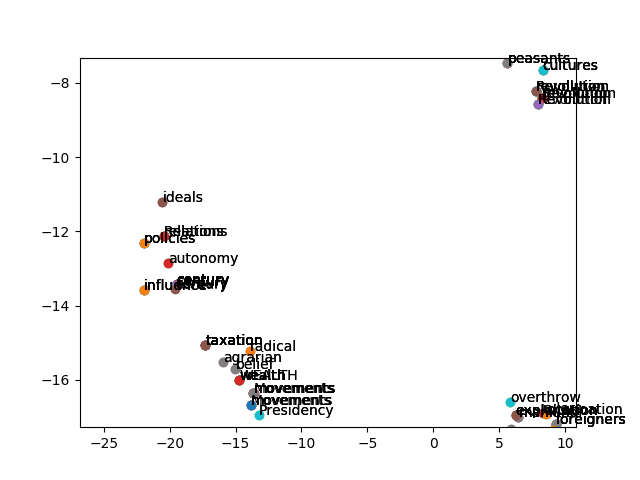

In [145]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(lsaOut)
xs, ys = X_tsne[:,0], X_tsne[:,1]
%matplotlib notebook
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(docNounLabels_order[i], (xs[i], ys[i]))

<IPython.core.display.Javascript object>


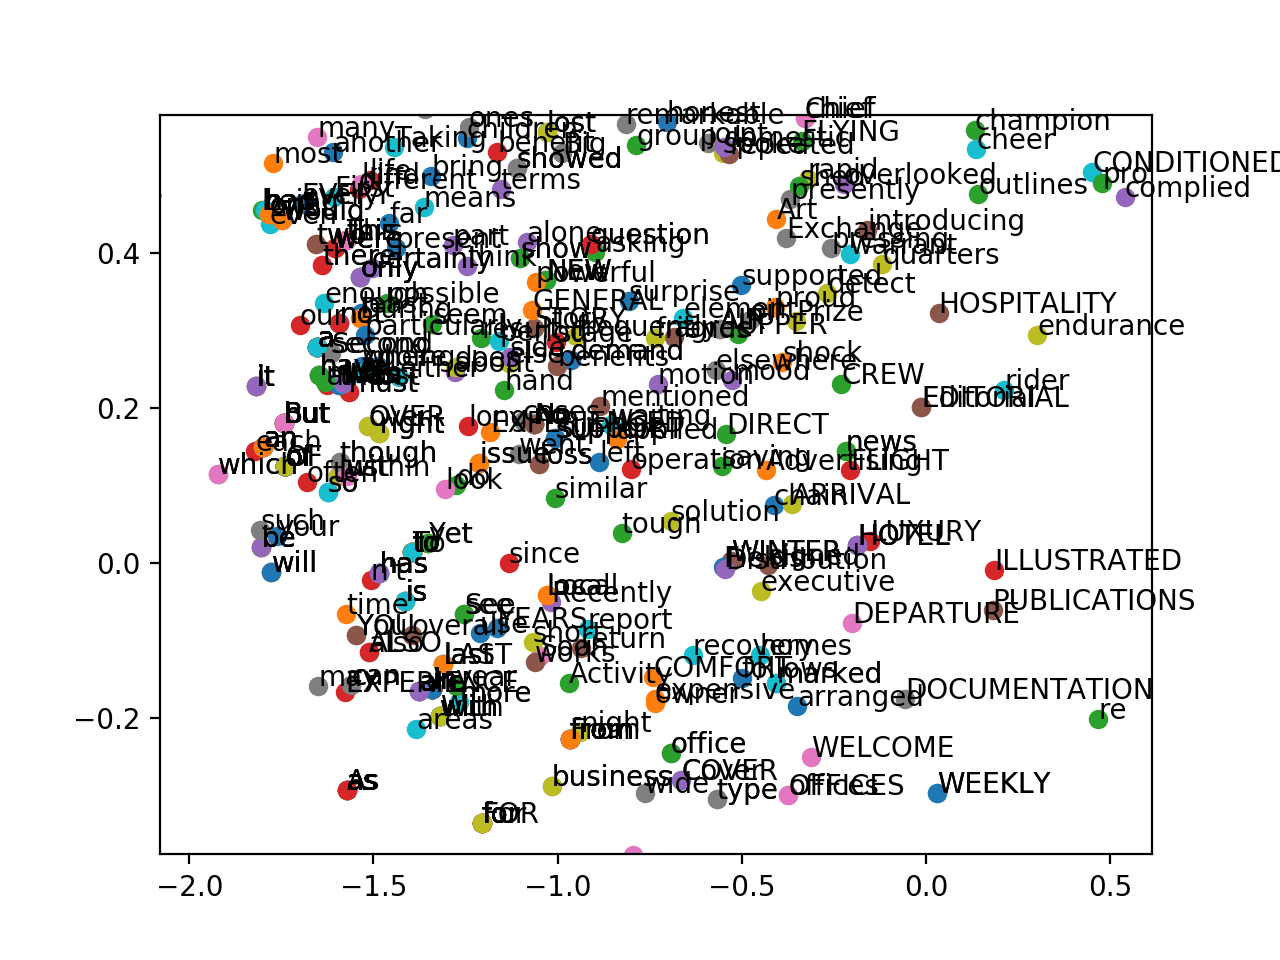

In [163]:

pca = PCA(n_components=2)
pcaOut = pca.fit_transform(docNounVecs)
%matplotlib notebook
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(docNounLabels[i], (xs[i], ys[i]))

In [11]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

    SPACE     False False
ARAB arab PROPN NNP ROOT XXXX True False

 
 SPACE   
 False False
Asia asia PROPN NNP nmod Xxxx True False
1,52 1,52 NUM CD nummod d,dd False False

 
 SPACE   
 False False
OBSERVER observer PROPN NNP nmod XXXX True False

 
 SPACE   
 False False
Price price PROPN NNP ROOT Xxxxx True False
in in ADP IN prep xx True True
U.A.R. u.a.r. PROPN NNP pobj X.X.X. False False

 
 SPACE   
 False False
P.T. p.t. PROPN NNP npadvmod X.X. False False
10 10 NUM CD nummod dd False False

 
 SPACE   
 False False
|THE |the ADJ JJ amod |XXX False False
NON non PROPN NNP compound XXX True False
- - PUNCT HYPH punct - False False
ALIGNED aligned PROPN NNP compound XXXX True False
WEEKLY weekly PROPN NNP ROOT XXXX True False

 
 SPACE   
 False False
No no NOUN NN ROOT Xx True False
. . PUNCT . punct . False False
180 180 NUM CD ROOT ddd False False
– – PUNCT HYPH punct – False False
December december PROPN NNP nmod Xxxxx True False
2 2 NUM CD nummod d False False
, , PUNCT , 

the the DET DT det xxx True True

 
 SPACE   
 False False
Arabs arabs PROPN NNPS nsubj Xxxxx True False
have have VERB VBP ccomp xxxx True True
right right NOUN NN advmod xxxx True False
on on ADP IN prep xx True True
their -PRON- ADJ PRP$ poss xxxx True True
side side NOUN NN pobj xxxx True True
, , PUNCT , punct , False False

 
 SPACE   
 False False
He -PRON- PRON PRP nsubj Xx True False

 
 SPACE   
 False False
cTibe ctibe PROPN NNP ROOT xXxxx True False

 
 SPACE   
 False False
( ( PUNCT -LRB- punct ( False False
See see VERB VB parataxis Xxx True False
our -PRON- ADJ PRP$ poss xxx True True
Cover cover PROPN NNP compound Xxxxx True False
Story story PROPN NNP dobj Xxxxx True False
on on ADP IN prep xx True True
page page NOUN NN pobj xxxx True False
8) 8) PROPN NNP ccomp d) False False

 
 SPACE   
 False False
OL ol PROPN NNP ROOT XX True False
. . PUNCT . punct . False False
Scribe scribe PROPN NNP ROOT Xxxxx True False

 
 SPACE   
 False False
O o INTJ UH intj X True Fals

and and CCONJ CC cc xxx True True
internati internati NOUN NNS conj xxxx True False

 
 SPACE   
 False False
Developments developments PROPN NNPS conj Xxxxx True False
in in ADP IN prep xx True True
All all PROPN NNP det Xxx True False
Fields fields PROPN NNPS pobj Xxxxx True False
of of ADP IN prep xx True True
Activity activity PROPN NNP pobj Xxxxx True False

 
 SPACE   
 False False
Distribution distribution NOUN NN compound Xxxxx True False
office office NOUN NN conj xxxx True False

 
 SPACE   
 False False
88 88 NUM CD dep dd False False
, , PUNCT , punct , False False
sh sh PRON PRP ROOT xx True False
. . PUNCT . punct . False False
Kasr kasr PROPN NNP amod Xxxx True False
el el PROPN NNP compound xx True False
NII nii PROPN NNP ROOT XXX True False
, , PUNCT , punct , False False
Cairo cairo PROPN NNP npadvmod Xxxxx True False

 
 SPACE   
 False False
Tel tel PROPN NNP ROOT Xxx True False
. . PUNCT . punct . False False
77360 77360 NUM CD ROOT dddd False False

 
 SPACE   
 F

 SPACE   
 False False
Steel steel PROPN NNP pobj Xxxxx True False
by by ADP IN prep xx True True
introducing introduce VERB VBG pcomp xxxx True False
price price NOUN NN dobj xxxx True False
con- con- NOUN NN ROOT xxx- False False

 
 SPACE   
 False False
eral eral ADJ JJ amod xxxx True False
policy policy NOUN NN ROOT xxxx True False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
future future NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
He -PRON- PRON PRP nsubj Xx True False

 
 SPACE   
 False False
| | PROPN NNP ROOT | False False
quarters quarter NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
Texas texas PROPN NNP compound Xxxxx True False
Zionists zionists PROPN NNPS pobj Xxxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
ferings fering NOUN NNS ROOT xxxx True False
, , PUNCT , punct , False False
such such ADJ JJ amod xxxx True True
friends friend NOUN NNS appos xxxx True

, , PUNCT , punct , False False

 
 SPACE   
 False False
from from ADP IN prep xxxx True True
nothing nothing NOUN NN pobj xxxx True True
to to PART TO aux xx True True
obtain obtain VERB VB relcl xxxx True False
its -PRON- ADJ PRP$ poss xxx True True
en en X FW dobj xx True False

 
 SPACE   
 False False
Then then ADV RB advmod Xxxx True False
there there ADV EX expl xxxx True True
are be VERB VBP ROOT xxx True True
the the DET DT det xxx True True
al al PROPN NNP nmod xx True False

 
 SPACE   
 False False
Castro castro PROPN NNP conj Xxxxx True False
refugees refugee NOUN NNS attr xxxx True False
, , PUNCT , punct , False False
who who NOUN WP nsubj xxx True True
must must VERB MD aux xxxx True True
be be VERB VB relcl xx True True

 
 SPACE   
 False False
been be VERB VBN auxpass xxxx True True
grieved grieve VERB VBN acomp xxxx True False
by by ADP IN agent xx True True
the the DET DT det xxx True True
Pres pres PROPN NNPS pobj Xxxx True False

 
 SPACE   
 False False
change 

 
 SPACE   
 False False
fore fore NOUN NN conj xxxx True False
he -PRON- PRON PRP nsubj xx True True
could could VERB MD aux xxxx True True
implicate implicate VERB VB relcl xxxx True False
anyone anyone NOUN NN dobj xxxx True True
) ) PUNCT -RRB- punct ) False False

 
 SPACE   
 False False
would would VERB MD aux xxxx True True
resist resist VERB VB conj xxxx True False
. . PUNCT . punct . False False
The the DET DT det Xxx True False
revelations revelation NOUN NNS nsubj xxxx True False

 
 SPACE   
 False False
or or CCONJ CC cc xx True True
someone someone NOUN NN conj xxxx True True
in in ADP IN prep xx True True
the the DET DT det xxx True True
conspiracy conspiracy NOUN NN pobj xxxx True False

 
 SPACE   
 False False
in in ADP IN prep xx True True
the the DET DT det xxx True True
Fulbright fulbright PROPN NNP compound Xxxxx True False
Report report PROPN NNP pobj Xxxxx True False

 
 SPACE   
 False False
panicked panic VERB VBD ROOT xxxx True False
and and CCONJ CC cc xxx 

 SPACE   
 False False
resented resent VERB VBD ccomp xxxx True False
all all ADJ PDT predet xxx True True
the the DET DT det xxx True True
more more ADJ JJR dobj xxxx True True
since since ADP IN prep xxxx True True
only only ADV RB pcomp xxxx True True

 
 SPACE   
 False False
utes ute NOUN NNS advcl xxxx True False
before before ADP IN mark xxxx True True
it -PRON- PRON PRP nsubj xx True True
occurred occur VERB VBD advcl xxxx True False
. . PUNCT . punct . False False
The the DET DT det Xxx True False

 
 SPACE   
 False False
last last ADJ JJ amod xxxx True True
year year NOUN NN ROOT xxxx True False
the the DET DT det xxx True True
US us PROPN NNP compound XX True False
delegation delegation NOUN NN nsubj xxxx True False
vot- vot- PROPN NNP relcl xxx- False False

 
 SPACE   
 False False
Italians italians PROPN NNPS nsubj Xxxxx True False
have have VERB VBP aux xxxx True True
shown show VERB VBN ROOT xxxx True False
that that ADP IN mark xxxx True True
in in ADP IN prep xx True

demands demand NOUN NNS conj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True

 
 SPACE   
 False False
fusing fuse VERB VBG advcl xxxx True False
to to PART TO aux xx True True
work work VERB VB xcomp xxxx True False
more more ADJ JJR advmod xxxx True True
than than ADP IN prep xxxx True True
the the DET DT det xxx True True
this this DET DT pobj xxxx True True

 
 SPACE   
 False False
and and CCONJ CC cc xxx True True
PT pt PROPN NNP conj XX True False
. . PUNCT . punct . False False
35 35 NUM CD ROOT dd False False
daily daily ADV RB advmod xxxx True False
, , PUNCT , punct , False False
allowances allowance NOUN NNS nsubj xxxx True False
being be VERB VBG ROOT xxxx True True

 
 SPACE   
 False False
and and CCONJ CC cc xxx True True
well well ADV RB advmod xxxx True True
- - PUNCT HYPH punct - False False
sprung spring VERB VBN amod xxxx True False
automobiles automobile NOUN NNS ROOT xxxx True False
of of ADP IN prep xx True True
a a DET DT det x T

deluge deluge NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
weal- weal- NOUN NN pobj xxxx- False False

 
 SPACE   
 False False
the the DET DT det xxx True True
appointment appointment NOUN NN nsubj xxxx True False
of of ADP IN prep xx True True
Anwar anwar PROPN NNP compound Xxxxx True False
Salama salama PROPN NNP pobj Xxxxx True False

 
 SPACE   
 False False
th th X XX ccomp xx True False
which which ADJ WDT dobj xxxx True True
his -PRON- ADJ PRP$ poss xxx True True
roughened roughen VERB VBN amod xxxx True False
hands hand NOUN NNS nsubj xxxx True False
have have VERB VBP ccomp xxxx True True

 
 SPACE   
 False False
« « PUNCT `` punct « False False
My -PRON- ADJ PRP$ poss Xx True False
labour labour NOUN NN compound xxxx True False
activities activity NOUN NNS nsubj xxxx True False
began begin VERB VBD ROOT xxxx True False
then then ADV RB advmod xxxx True True
, , PUNCT , punct , False False

 
 SPACE   
 False False
cial cial NOUN NN nmod xxxx True False
organi

workers worker NOUN NNS pobj xxxx True False
on on ADP IN prep xx True True
the the DET DT det xxx True True

 
 SPACE   
 False False
which which ADJ WDT pobj xxxx True True
entitles entitle VERB VBZ acl xxxx True False
workers worker NOUN NNS dobj xxxx True False
to to ADP IN prep xx True True
25 25 NUM CD pobj dd False False
per per NOUN NN prep xxx True True
cent cent NOUN NN compound xxxx True False
board board NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
directors director NOUN NNS pobj xxxx True False
; ; PUNCT : punct ; False False
4 4 PUNCT LS nummod d False False
) ) PUNCT -RRB- punct ) False False
uniformity uniformity NOUN NN appos xxxx True False
of of ADP IN prep xx True True

 
 SPACE   
 False False
of of ADP IN prep xx True True
the the DET DT det xxx True True
net net ADJ JJ amod xxx True False
profit profit NOUN NN pobj xxxx True False
in in ADP IN prep xx True True
any any DET DT det xxx True True
institution institution NOUN NN pobj xxxx True False



Observer observer PROPN NNP compound Xxxxx True False
reporter reporter NOUN NN nsubj xxxx True False
also also ADV RB advmod xxxx True True

 
 SPACE   
 False False
met meet VERB VBD ROOT xxx True False
Mohammed mohammed PROPN NNP compound Xxxxx True False
Said said PROPN NNP compound Xxxx True False
Basharine basharine PROPN NNP dobj Xxxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True

 
 SPACE   
 False False
Secretary secretary PROPN NNP compound Xxxxx True False
General general PROPN NNP appos Xxxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
General general PROPN NNP pobj Xxxxx True False

 
 SPACE   
 False False
Union union PROPN NNP pobj Xxxxx True False
of of ADP IN prep xx True True
Petroleum petroleum PROPN NNP compound Xxxxx True False
Workers workers PROPN NNPS pobj Xxxxx True False
in in ADP IN prep xx True True

 
 SPACE   
 False False
Aden aden PROPN NNP pobj Xxxx True False
, , PUNCT , punct , False False


the the DET DT det xxx True True
International international PROPN NNP compound Xxxxx True False
Wor- wor- PROPN NNP pobj Xxx- False False

 
 SPACE   
 False False
the the DET DT det xxx True True
AFPW afpw PROPN NNP nsubj XXXX True False
met meet VERB VBD conj xxx True False
to to PART TO aux xx True True
draw draw VERB VB advcl xxxx True False
up up PART RP prt xx True True
the the DET DT det xxx True True

 
 SPACE   
 False False
kers ker NOUN NNS poss xxxx True False
' ' PART POS case ' False False
Federation federation PROPN NNP dobj Xxxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
policy policy NOUN NN ROOT xxxx True False
and and CCONJ CC cc xxx True True
projects project NOUN NNS conj xxxx True False
for for ADP IN prep xxx True True
1964 1964 NUM CD pobj dddd False False
. . PUNCT . punct . False False
The the DET DT det Xxx True False

 
 SPACE   
 False False
Council council PROPN NNP poss Xxxxx True False
's 's PART POS case 'x False False
recomm

workers worker NOUN NNS conj xxxx True False
syndicates syndicate NOUN NNS dobj xxxx True False
in in ADP IN prep xx True True
a a DET DT det x True True

 
 SPACE   
 False False
the the DET DT det xxx True True
Arah arah PROPN NNP compound Xxxx True False
regions region NOUN NNS pobj xxxx True False
and and CCONJ CC cc xxx True True
make make VERB VB conj xxxx True True
all all ADJ PDT predet xxx True True
the the DET DT det xxx True True

 
 SPACE   
 False False
forts fort NOUN NNS nsubj xxxx True False
to to PART TO aux xx True True
amalgamate amalgamate VERB VB ccomp xxxx True False
corollar corollar ADJ JJ dobj xxxx True False
) ) PUNCT -RRB- punct ) False False

 
 SPACE   
 False False
syndicates syndicate NOUN NNS dep xxxx True False
in in ADP IN prep xx True True
a a DET DT det x True True
single single ADJ JJ amod xxxx True False
region region NOUN NN pobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
« « PUNCT `` ROOT « False False
We -PRON- PRO

and and CCONJ CC cc xxx True True
their -PRON- ADJ PRP$ poss xxxx True True
cultural cultural ADJ JJ amod xxxx True False
and and CCONJ CC cc xxx True True

 
 SPACE   
 False False
Arab arab ADJ JJ conj Xxxx True False
resources resource NOUN NNS conj xxxx True False
against against ADP IN prep xxxx True True
exploitation exploitation NOUN NN pobj xxxx True False

 
 SPACE   
 False False
legislative legislative ADJ JJ amod xxxx True False
responsibilities responsibility NOUN NNS dobj xxxx True False
towards towards ADP IN prep xxxx True True

 
 SPACE   
 False False
and and CCONJ CC cc xxx True True
exhaustion exhaustion NOUN NN conj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
the the DET DT det xxx True True
workers worker NOUN NNS ROOT xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
The the DET DT det Xxx True False
Conference conference PROPN NNP nsubj Xxxxx True False
is be VERB VBZ ccomp xx True True
the the DET DT det xxx

however however ADV RB advmod xxxx True True
, , PUNCT , punct , False False
Iraq iraq PROPN NNP dep Xxxx True False

 
 SPACE   
 False False
ee ee ADP IN conj xx True False
to to ADP IN prep xx True True
it -PRON- PRON PRP pobj xx True True
that that ADP IN mark xxxx True True
75 75 NUM CD intj dd False False
per per NOUN NN prep xxx True True
cent cent NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
its -PRON- ADJ PRP$ poss xxx True True

 
 SPACE   
 False False
leum leum NOUN NN compound xxxx True False
workers worker NOUN NNS pobj xxxx True False
are be VERB VBP ROOT xxx True True
Iraqis iraqis PROPN NNPS attr Xxxxx True False
. . PUNCT . punct . False False
By by ADP IN ROOT Xx True False

 
 SPACE   
 False False
Oil oil PROPN NNP compound Xxx True False
delegates delegate NOUN NNS nsubj xxxx True False
visiting visit VERB VBG pcomp xxxx True False
UAR uar PROPN NNP compound XXX True False
Embassy embassy PROPN NNP dobj Xxxxx True False
in in ADP IN prep xx True Tru

te te PART TO dobj xx True False

 
 SPACE   
 False False
away away ADV RB advmod xxxx True False
and and CCONJ CC cc xxx True True
proceeds proceed VERB VBZ conj xxxx True False
to to PART TO aux xx True True
give give VERB VB advcl xxxx True True
the the DET DT det xxx True True
man man NOUN NN dative xxx True False

 
 SPACE   
 False False
woman woman NOUN NN conj xxxx True False
, , PUNCT , punct , False False
Mrs. mrs. PROPN NNP compound Xxx. False False
Brooke brooke PROPN NNP appos Xxxxx True False
, , PUNCT , punct , False False
as as ADP IN mark xx True True
a a DET DT det x True True
refuge refuge NOUN NN pobj xxxx True False

 
 SPACE   
 False False
was be VERB VBD advcl xxx True True
absolutely absolutely ADV RB advmod xxxx True False
no no DET DT det xx True True
social social ADJ JJ amod xxxx True False
care care NOUN NN attr xxxx True False
, , PUNCT , punct , False False
meals meal NOUN NNS conj xxxx True False

 
 SPACE   
 False False
finery finery NOUN NN conj xxx

the the DET DT det xxx True True
Veterinary veterinary PROPN NNP appos Xxxxx True False

 
 SPACE   
 False False
from from ADP IN prep xxxx True True
intentional intentional ADJ JJ amod xxxx True False
cruelty cruelty NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
out out ADP IN conj xxx True True
of of ADP IN prep xx True True
Director director PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
showed show VERB VBD conj xxxx True False
him -PRON- PRON PRP dative xxx True True
two two NUM CD nummod xxx True True
poor poor ADJ JJ amod xxxx True False
old old ADJ JJ amod xxx True False

 
 SPACE   
 False False
Brooke brooke PROPN NNP compound Xxxxx True False
Ambulance ambulance PROPN NNP nmod Xxxxx True False

 
 SPACE   
 False False
regions region NOUN NNS dobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
ject ject ADJ JJ csubj xxxx True False
under under ADP IN prep xxxx True True
way way NOUN

care care NOUN NN attr xxxx True False
of of ADP IN prep xx True True
their -PRON- ADJ PRP$ poss xxxx True True
horses horse NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
mules mule NOUN NNS appos xxxx True False

 
 SPACE   
 False False
sal sal NOUN NN acomp xxx True False
. . PUNCT . punct . False False
The the DET DT det Xxx True False
syndicate syndicate NOUN NN nsubj xxxx True False
also also ADV RB advmod xxxx True True
provides provide VERB VBZ ROOT xxxx True False
free free ADJ JJ amod xxxx True False

 
 SPACE   
 False False
the the DET DT det xxx True True
labour labour ADJ JJ compound xxxx True False
organisations organisation NOUN NNS dobj xxxx True False
. . PUNCT . punct . False False
But but CCONJ CC cc Xxx True False
real real ADJ JJ amod xxxx True False

 
 SPACE   
 False False
gions gion NOUN NNS nsubj xxxx True False
must must VERB MD aux xxxx True True
therefore therefore ADV RB advmod xxxx True True
be be VERB VB ccomp xx True True
reorgan reorga

answer answer NOUN NN conj xxxx True False
emergency emergency NOUN NN compound xxxx True False
calls call VERB VBZ dobj xxxx True False
for for ADP IN prep xxx True True

 
 SPACE   
 False False
cases case NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
300 300 NUM CD nsubj ddd False False
of of ADP IN prep xx True True
which which ADJ WDT pobj xxxx True True
came come VERB VBD relcl xxxx True False
to to PART TO prep xx True True

 
 SPACE   
 False False
a a DET DT det x True True
provision provision NOUN NN compound xxxx True False
port port NOUN NN appos xxxx True False
for for ADP IN prep xxx True True
its -PRON- ADJ PRP$ poss xxx True True
strategic strategic ADJ JJ amod xxxx True False

 
 SPACE   
 False False
convenience convenience NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
cheap cheap ADJ JJ amod xxxx True False
manpower manpower NOUN NN conj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
ation ation NOUN NN ROOT

their -PRON- ADJ PRP$ poss xxxx True True
heads head NOUN NNS dobj xxxx True False
off off PART RP prt xxx True True
, , PUNCT , punct , False False
most most ADJ JJS nsubj xxxx True True
of of ADP IN prep xx True True
them -PRON- PRON PRP pobj xxxx True True

 
 SPACE   
 False False
Dr. dr. PROPN NNP compound Xx. False False
Murad murad PROPN NNP nsubj Xxxxx True False
treats treat VERB VBZ nsubj xxxx True False
ear ear VERB VBP conj xxx True False
casualty casualty NOUN NN dobj xxxx True False

 
 SPACE   
 False False
recovering recover VERB VBG advcl xxxx True False
from from ADP IN prep xxxx True True
debility debility NOUN NN pobj xxxx True False
or or CCONJ CC cc xx True True
mizor mizor NOUN NN conj xxxx True False

 
 SPACE   
 False False
injuries injury NOUN NNS conj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
Since since ADP IN prep Xxxxx True False
the the DET DT det xxx True True
Revolution revolution PROPN NNP pobj Xxxxx True False
, , PUNC

the the DET DT det xxx True True

 
 SPACE   
 False False
administrative administrative ADJ JJ amod xxxx True False
building building NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
dis- dis- NOUN NN conj xxx- False False

 
 SPACE   
 False False
vided vid VERB VBD conj xxxx True False
free free ADJ JJ advcl xxxx True False
of of ADP IN prep xx True True
charge charge NOUN NN pobj xxxx True False
by by ADP IN agent xx True True
the the DET DT det xxx True True
Minis- minis- PROPN NNP nmod Xxxxx- False False

 
 SPACE   
 False False
clinic clinic NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
the the DET DT det xxx True True
faith faith NOUN NN conj xxxx True False
everyone everyone NOUN NN nsubj xxxx True True
places place VERB VBZ relcl xxxx True False

 
 SPACE   
 False False
pensary pensary ADJ JJ amod xxxx True False
, , PUNCT , punct , False False
a a DET DT det x True True
large large ADJ JJ amod xxxx True False
compound compound NOUN NN appos x

 
 SPACE   
 False False
condary condary ADJ JJ amod xxxx True False
school school NOUN NN compound xxxx True False
phase phase NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
It -PRON- PRON PRP nsubj Xx True False
is be VERB VBZ ROOT xx True True
currently currently ADV RB advmod xxxx True False

 
 SPACE   
 False False
holding hold VERB VBG advcl xxxx True False
talks talk NOUN NNS dobj xxxx True False
with with ADP IN prep xxxx True True
University university PROPN NNP compound Xxxxx True False
profes- profes- NOUN NN nmod xxxx- False False

 
 SPACE   
 False False
sors sor NOUN NNS pobj xxxx True False
to to PART TO aux xx True True
outline outline VERB VB acl xxxx True False
a a DET DT det x True True
programme programme NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
uni- uni- ADJ JJ nmod xxx- False False

 
 SPACE   
 False False
versity versity NOUN NN compound xxxx True False
students student NOUN NNS pobj xxxx True False
. . PUNCT . punct . False

revealed reveal VERB VBN conj xxxx True False
since since ADP IN mark xxxx True True
he -PRON- PRON PRP nsubj xx True True
re re VERB VBP nmod xx True True
- - PUNCT HYPH punct - False False
emerged emerge VERB VBN punct xxxx True False

 
 SPACE   
 False False
tack tack NOUN NN ccomp xxxx True False
him -PRON- PRON PRP dobj xxx True True
openly openly ADV RB advmod xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
a a DET DT det x True True
bloodbath bloodbath NOUN NN nsubj xxxx True False
in in ADP IN prep xx True True
which which ADJ WDT pobj xxxx True True
many many ADJ JJ relcl xxxx True True

 
 SPACE   
 False False
on on ADP IN prep xx True True
the the DET DT det xxx True True
Iraqi iraqi ADJ JJ amod Xxxxx True False
scene scene NOUN NN pobj xxxx True False
after after ADP IN prep xxxx True True
five five NUM CD nummod xxxx True True
days day NOUN NNS pobj xxxx True False
' ' PART POS case ' False False

 
 SPACE   
 False False
thousands thousand NOUN

with with ADP IN prep xxxx True True
the the DET DT det xxx True True
subject subject NOUN NN pobj xxxx True False
of of ADP IN prep xx True True

 
 SPACE   
 False False
Arab arab ADJ JJ compound Xxxx True False
Unity unity PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False
The the DET DT det Xxx True False
political political ADJ JJ amod xxxx True False
revolution revolution NOUN NN nsubjpass xxxx True False
to to PART TO aux xx True True
rid rid VERB VB acl xxx True False
the the DET DT det xxx True True
Arab arab ADJ JJ amod Xxxx True False
peoples people NOUN NNS dobj xxxx True False
of of ADP IN prep xx True True
foreign foreign ADJ JJ amod xxxx True False
occu- occu- NOUN NN pobj xxxx- False False

 
 SPACE   
 False False
piers pier NOUN NNS conj xxxx True False
and and CCONJ CC cc xxx True True
domestic domestic ADJ JJ amod xxxx True False
tyrants tyrant NOUN NNS conj xxxx True False
is be VERB VBZ auxpass xx True True
virtually virtually ADV RB advmod xxxx True 

first first ADJ JJ amod xxxx True True
half half NOUN NN conj xxxx True False
within within ADP IN prep xxxx True True
the the DET DT det xxx True True
principles principle NOUN NNS pobj xxxx True False
on on ADP IN prep xx True True
which which ADJ WDT pobj xxxx True True
Unity unity NOUN NN compound Xxxxx True False
Governments government NOUN NNS nsubjpass Xxxxx True False
, , PUNCT , punct , False False
so so ADV RB cc xx True True

 
 SPACE   
 False False
of of ADP IN prep xx True True
the the DET DT det xxx True True
20th 20th ADJ JJ amod ddxx False False
centuries century NOUN NNS pobj xxxx True False
be be VERB VB auxpass xx True True
overcome overcome VERB VBN relcl xxxx True False
, , PUNCT , punct , False False
must must VERB MD aux xxxx True True
be be VERB VB auxpass xx True True
based base VERB VBN ROOT xxxx True False
. . PUNCT . punct . False False
The the DET DT det Xxx True False
actual actual ADJ JJ amod xxxx True False
struggle struggle NOUN NN nsubj xxxx True Fals

played play VERB VBN ROOT xxxx True False
an an DET DT det xx True True
active active ADJ JJ amod xxxx True False
role role NOUN NN dobj xxxx True False
in in ADP IN prep xx True True

 
 SPACE   
 False False
has have VERB VBZ aux xxx True True
recently recently ADV RB advmod xxxx True False
been be VERB VBN conj xxxx True True
in in ADP IN prep xx True True
session session NOUN NN pobj xxxx True False
at at ADP IN prep xx True True
Bei- bei- PROPN NNP pobj Xxx- False False

 
 SPACE   
 False False
Arab arab ADJ JJ amod Xxxx True False
politics politic NOUN NNS pobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
rut rut NOUN NN poss xxx True False
's 's PART POS case 'x False False
Riviera riviera PROPN NNP compound Xxxxx True False
Hotel hotel PROPN NNP ROOT Xxxxx True False
on on ADP IN prep xx True True
linking link VERB VBG pcomp xxxx True False
Arab arab ADJ JJ amod Xxxx True False

 
 SPACE   
 False False
tourism tourism NOUN NN dobj xxxx True False


the the DET DT det xxx True True
security security NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
nation nation NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True

 
 SPACE   
 False False
what what NOUN WP attr xxxx True True
are be VERB VBP ccomp xxx True True
the the DET DT det xxx True True
lessons lesson NOUN NNS nsubj xxxx True False
to to PART TO aux xx True True
be be VERB VB auxpass xx True True
learned learn VERB VBN relcl xxxx True False

 
 SPACE   
 False False
( ( PUNCT -LRB- punct ( False False
b b NOUN NN parataxis x True False
) ) PUNCT -RRB- punct ) False False
if if ADP IN mark xx True True
it -PRON- PRON PRP nsubj xx True True
behaves behave VERB VBZ advcl xxxx True False
well well ADV RB advmod xxxx True True
. . PUNCT . punct . False False

 
 SPACE   
 False False
from from ADP IN ROOT xxxx True True
the the DET DT det xxx True True
nine nine NUM CD nummod xxxx True True
months month NOUN NNS pobj xxxx Tru

thugs thug NOUN NNS attr xxxx True False

 
 SPACE   
 False False
never never ADV RB neg xxxx True True
be be VERB VB auxpass xx True True
condoned condone VERB VBN acomp xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
who who NOUN WP nsubj xxx True True
burst burst VERB VBP ROOT xxxx True False
into into ADP IN prep xxxx True True
private private ADJ JJ amod xxxx True False
houses house NOUN NNS pobj xxxx True False

 
 SPACE   
 False False
A a DET DT det X True False
new new ADJ JJ amod xxx True False
era era NOUN NN dobj xxx True False

 
 SPACE   
 False False
claiming claim VERB VBG acl xxxx True False
to to PART TO aux xx True True
be be VERB VB aux xx True True
searching search VERB VBG xcomp xxxx True False
for for ADP IN prep xxx True True
< < X XX nmod < False False
sub- sub- X XX pobj xxx- False False

 
 SPACE   
 False False
versive versive ADJ JJ advcl xxxx True False
documents document NOUN NNS dobj xxxx True False
> > X XX dobj > False False


rich rich ADJ JJ amod xxxx True False
country country NOUN NN attr xxxx True False
that that ADJ WDT dobj xxxx True True
with with ADP IN prep xxxx True True
a a DET DT pobj x True True

 
 SPACE   
 False False
of of ADP IN prep xx True True
stability stability NOUN NN pobj xxxx True False
it -PRON- PRON PRP nsubj xx True True
could could VERB MD aux xxxx True True
progres progre NOUN NNS relcl xxxx True False

 
 SPACE   
 False False
rapidly rapidly ADV RB advmod xxxx True False
. . PUNCT . punct . False False
What what NOUN WP dobj Xxxx True False
the the DET DT det xxx True True
country country NOUN NN nsubj xxxx True False
can can VERB MD aux xxx True True

 
 SPACE   
 False False
afford afford NOUN NN csubj xxxx True False
is be VERB VBZ ROOT xx True True
to to PART TO aux xx True True
be be VERB VB auxpass xx True True
ruled rule VERB VBN xcomp xxxx True False
again again ADV RB advmod xxxx True True

 
 SPACE   
 False False
by by ADP IN agent xx True True
an an DET DT det xx

that that ADP IN mark xxxx True True
they -PRON- PRON PRP nsubj xxxx True True
, , PUNCT , punct , False False
too too ADV RB advmod xxx True True
, , PUNCT , punct , False False
might may VERB MD aux xxxx True True
encourage encourage VERB VB acl xxxx True False
( ( PUNCT -LRB- punct ( False False
deleted delete VERB VBN parataxis xxxx True False

 
 SPACE   
 False False
to to PART TO aux xx True True
withdraw withdraw VERB VB xcomp xxxx True False
this this DET DT det xxxx True True
support support NOUN NN dobj xxxx True False
from from ADP IN prep xxxx True True
the the DET DT det xxx True True
( ( PUNCT -LRB- punct ( False False
de de X FW advmod xx True False

 
 SPACE   
 False False
leted leted ADJ JJ amod xxxx True False
) ) PUNCT -RRB- punct ) False False
letter letter NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
materials material NOUN NNS conj xxxx True False
. . PUNCT . punct . False False
) ) PUNCT -RRB- punct ) False False

 
 SPACE   
 False False
Afte

other other ADJ JJ amod xxxx True True
young young ADJ JJ amod xxxx True False
people people NOUN NNS ROOT xxxx True False
in in ADP IN prep xx True True
America america PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
Documents document NOUN NNS nsubj Xxxxx True False
transmitted transmit VERB VBN acl xxxx True False
by by ADP IN agent xx True True
the the DET DT det xxx True True
Rev. rev. PROPN NNP nmod Xxx. False False

 
 SPACE   
 False False
Other other ADJ JJ amod Xxxxx True False
items item NOUN NNS pobj xxxx True False
deal deal VERB VBP ccomp xxxx True False
with with ADP IN prep xxxx True True
distribution distribution NOUN NN pobj xxxx True False
of of ADP IN prep xx True True

 
 SPACE   
 False False
Karl karl PROPN NNP compound Xxxx True False
Baehr baehr PROPN NNP pobj Xxxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
ACPC acpc PROPN NNP pobj XXXX True False
to to ADP IN prep xx True True
Rabbi rab

a a DET DT det x True True
member member NOUN NN attr xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
American american PROPN NNP amod Xxxxx True False

 
 SPACE   
 False False
portion portion NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
proceeds proceed NOUN NNS pobj xxxx True False
went go VERB VBD conj xxxx True False
to to ADP IN prep xx True True
UIA uia PROPN NNP nmod XXX True False

 
 SPACE   
 False False
Jerome jerome PROPN NNP compound Xxxxx True False
Unger unger PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
Zionist zionist PROPN NNP compound Xxxxx True False
Council council PROPN NNP ROOT Xxxxx True False
on on ADP IN prep xx True True
behalf behalf NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
Hadassah hadassah PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
in in ADV RB ROOT xx True True
, , P

, , PUNCT , punct , False False
I -PRON- PRON PRP nsubj X True False
have have VERB VBP aux xxxx True True
never never ADV RB neg xxxx True True
seen see VERB VBN ROOT xxxx True False
these these DET DT det xxxx True True
reports report NOUN NNS dobj xxxx True False

 
 SPACE   
 False False
before before ADV RB advmod xxxx True True
. . PUNCT . punct . False False

 
 SPACE   
 False False
The the DET DT det Xxx True False
Chairman chairman PROPN NNP ROOT Xxxxx True False
: : PUNCT : punct : False False
Your -PRON- ADJ PRP$ poss Xxxx True False
organisation organisation NOUN NN appos xxxx True False
, , PUNCT , punct , False False

 
 SPACE   
 False False
WHO who NOUN WP attr XXX True False
'S be VERB VBZ relcl 'X False False
HIS his ADJ PRP$ compound XXX True False
BOss boss PROPN NNP attr XXxx True False
? ? PUNCT . punct ? False False

 
 SPACE   
 False False
prior prior ADV RB advmod xxxx True False
to to ADP IN prep xx True True
1960 1960 NUM CD pobj dddd False False
, , PUNCT 

know know VERB VBP ROOT xxxx True False
that that ADP IN mark xxxx True True

 
 SPACE   
 False False
present present NOUN NN ccomp xxxx True False
reorganised reorganise VERB VBN amod xxxx True False
status status NOUN NN dobj xxxx True False
? ? PUNCT . punct ? False False

 
 SPACE   
 False False
ere ere ADV RB nsubj xxx True False
is be VERB VBZ ROOT xx True True
an an DET DT det xx True True
activity activity NOUN NN attr xxxx True False
called call VERB VBN acl xxxx True False
the the DET DT det xxx True True
American american PROPN NNP nmod Xxxxx True False

 
 SPACE   
 False False
FUND fund PROPN NNP compound XXXX True False
- - PUNCT HYPH punct - False False
RAISING raise VERB VBG compound XXXX True False
TRANSACTIONS transaction NOUN NNS oprd XXXX True False

 
 SPACE   
 False False
Mr. mr. PROPN NNP compound Xx. False False
Hammer hammer PROPN NNP oprd Xxxxx True False
: : PUNCT : punct : False False
Yes yes INTJ UH ROOT Xxx True False
, , PUNCT , punct , False False
Sir

of of ADP IN prep xx True True
the the DET DT det xxx True True
funds fund NOUN NNS pobj xxxx True False
that that ADJ WDT dobj xxxx True True
you -PRON- PRON PRP nsubj xxx True True
re- re- ADV RB relcl xx- False False

 
 SPACE   
 False False
Agency agency PROPN NNP ROOT Xxxxx True False
, , PUNCT , punct , False False
Inc. inc. PROPN NNP npadvmod Xxx. False False
? ? PUNCT . punct ? False False

 
 SPACE   
 False False
isations isation NOUN NNS ROOT xxxx True False
and and CCONJ CC cc xxx True True
their -PRON- ADJ PRP$ poss xxxx True True
own own ADJ JJ amod xxx True True
organisations organisation NOUN NNS conj xxxx True False
, , PUNCT , punct , False False

 
 SPACE   
 False False
ceived ceived ADJ JJ intj xxxx True False
did do VERB VBD aux xxx True True
you -PRON- PRON PRP nsubj xxx True True
pass pass VERB VB ROOT xxxx True False
on on PART RP prt xx True True
to to ADP IN prep xx True True
the the DET DT det xxx True True
Jewish jewish PROPN NNP pobj Xxxxx True False

 
 

 False False
The the DET DT det Xxx True False
Chairman chairman PROPN NNP npadvmod Xxxxx True False
: : PUNCT : punct : False False
Were be VERB VBD ROOT Xxxx True False
you -PRON- PRON PRP nsubj xxx True True
prior prior ADV RB advmod xxxx True False
to to ADP IN prep xx True True

 
 SPACE   
 False False
paid pay VERB VBN advcl xxxx True False
over over ADV RB prt xxxx True True
to to ADP IN prep xx True True
the the DET DT det xxx True True
American american ADJ JJ compound Xxxxx True False
Zionist zionist PROPN NNP compound Xxxxx True False
Coun- coun- PROPN NNP pobj Xxxx- False False

 
 SPACE   
 False False
1960 1960 NUM CD appos dddd False False
exempt exempt NOUN NN amod xxxx True False
from from ADP IN prep xxxx True True
taxation taxation NOUN NN pobj xxxx True False
under under ADP IN prep xxxx True True
the the DET DT det xxx True True

 
 SPACE   
 False False
cil cil NOUN NN pobj xxx True False
we -PRON- PRON PRP nsubj xx True True
regarded regard VERB VBD relcl xxxx T

: : PUNCT : punct : False False
Yes yes INTJ UH intj Xxx True False
; ; PUNCT : punct ; False False
I -PRON- PRON PRP nsubjpass X True False
was be VERB VBD auxpass xxx True True
connected connect VERB VBN ROOT xxxx True False

 
 SPACE   
 False False
with with ADP IN prep xxxx True True
the the DET DT det xxx True True
Jewish jewish ADJ JJ amod Xxxxx True False
Agency agency PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False
That that DET DT nsubj Xxxx True False
was be VERB VBD ROOT xxx True True
II ii PROPN NNP attr XX True False

 
 SPACE   
 False False
The the DET DT det Xxx True False
Chairman chairman PROPN NNP attr Xxxxx True False
: : PUNCT : punct : False False
In in ADP IN ROOT Xx True False
what what ADJ WDT det xxxx True True
capacity capacity NOUN NN pcomp xxxx True False

 
 SPACE   
 False False
Mr. mr. PROPN NNP compound Xx. False False
Hammer hammer PROPN NNP conj Xxxxx True False
: : PUNCT : punct : False False
Executive executive ADJ JJ compound Xxxxx

. . PUNCT . punct . False False

 
 SPACE   
 False False
He -PRON- PRON PRP nsubj Xx True False
had have VERB VBD ROOT xxx True True
a a DET DT det x True True
passion passion NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
travel travel NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
visiting visit VERB VBG advcl xxxx True False
Constantinople constantinople PROPN NNP dobj Xxxxx True False
and and CCONJ CC cc xxx True True
Asia asia PROPN NNP conj Xxxx True False

 
 SPACE   
 False False
Minor minor PROPN NNP conj Xxxxx True False
, , PUNCT , punct , False False
Palestine palestine PROPN NNP conj Xxxxx True False
and and CCONJ CC cc xxx True True
Egypt egypt PROPN NNP conj Xxxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
after after ADP IN conj xxxx True True
1830 1830 NUM CD nummod dddd False False
Algiers algiers PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False
More more ADJ JJR advmod Xxxx True False
tha

he -PRON- PRON PRP nsubj xx True True
could could VERB MD aux xxxx True True
see see VERB VB ccomp xxx True True
no no DET DT det xx True True
reason reason NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
debating debate VERB VBG pcomp xxxx True False
the the DET DT det xxx True True

 
 SPACE   
 False False
whatsoever whatsoever ADV RB dobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
frontier frontier NOUN NN compound xxxx True False
question question NOUN NN ROOT xxxx True False
. . PUNCT . punct . False False
If if ADP IN mark Xx True False
African african ADJ JJ amod Xxxxx True False
border border NOUN NN nmod xxxx True False

 
 SPACE   
 False False
lines line NOUN NNS nsubj xxxx True False
are be VERB VBP advcl xxx True True
artificial artificial ADJ JJ acomp xxxx True False
, , PUNCT , punct , False False
he -PRON- PRON PRP nsubj xx True True
said say VERB VBD parataxis xxxx True False
, , PUNCT , punct , False False
it -PRON- PRON 

, , PUNCT , punct , False False
with with ADP IN prep xxxx True True
word word NOUN NN pobj xxxx True False
left leave VERB VBN acl xxxx True False
behind behind ADV RB prt xxxx True True
that that ADP IN dobj xxxx True True
the the DET DT det xxx True True
matter matter NOUN NN nsubj xxxx True False
rests rest VERB VBZ ccomp xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
others other NOUN NNS nsubj xxxx True True
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
Africa africa PROPN NNP poss Xxxxx True False
's 's PART POS case 'x False False
hard hard ADV RB advmod xxxx True False
- - PUNCT HYPH punct - False False
won win VERB VBN amod xxx True False
first first ADJ JJ amod xxxx True True
gain gain NOUN NN conj xxxx True False

 
 SPACE   
 False False
for for ADP IN prep xxx True True
unity unity NOUN NN pobj xxxx True False
would would VERB MD aux xxxx True True
almost almost ADV RB advmod xxxx True True
certainly certainly ADV RB advmod x

however however ADV RB advmod xxxx True True
, , PUNCT , punct , False False
is be VERB VBZ ROOT xx True True
anybody anybody NOUN NN attr xxxx True False

 
 SPACE   
 False False
yatta yatta NOUN NN conj xxxx True False
and and CCONJ CC cc xxx True True
Premier premier PROPN NNP compound Xxxxx True False
Milton milton PROPN NNP compound Xxxxx True False
Obote obote PROPN NNP conj Xxxxx True False
of of ADP IN prep xx True True

 
 SPACE   
 False False
guess guess NOUN NN attr xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
Uganda uganda PROPN NNP nsubj Xxxxx True False
, , PUNCT , punct , False False
declared declare VERB VBD ROOT xxxx True False
in in ADP IN prep xx True True
June june PROPN NNP pobj Xxxx True False
this this DET DT det xxxx True True
year year NOUN NN npadvmod xxxx True False
that that ADJ WDT mark xxxx True True

 
 SPACE   
 False False
an an DET DT det xx True True
East east PROPN NNP compound Xxxx True False
African african PROPN NNP 

of of ADP IN prep xx True True
the the DET DT pobj xxx True True
and and CCONJ CC cc xxx True True
Kenya kenya PROPN NNP conj Xxxxx True False
will will VERB MD aux xxxx True True
federate federate VERB VB acl xxxx True False
first first ADV RB advmod xxxx True True
, , PUNCT , punct , False False
with with ADP IN prep xxxx True True

 
 SPACE   
 False False
83 83 NUM CD pobj dd False False

 
 SPACE   
 False False
Immediately immediately ADV RB advmod Xxxxx True False
at at ADP IN prep xx True True
stake stake NOUN NN pobj xxxx True False
is be VERB VBZ conj xx True True
almost almost ADV RB advmod xxxx True True

 
 SPACE   
 False False
entire entire ADJ JJ amod xxxx True False
south south ADJ JJ amod xxxx True False
- - PUNCT HYPH punct - False False
western western ADJ JJ amod xxxx True False
corner corner NOUN NN attr xxxx True False
of of ADP IN prep xx True True
what what NOUN WP nsubj xxxx True True

 
 SPACE   
 False False
now now ADV RB advmod xxx True True
regarded regar

, , PUNCT , punct , False False
« « PUNCT `` punct « False False
We -PRON- PRON PRP nsubj Xx True False

 
 SPACE   
 False False
will will VERB MD aux xxxx True True
not not ADV RB neg xxx True True
change change VERB VB ROOT xxxx True False
one one NUM CD nummod xxx True True
single single ADJ JJ amod xxxx True False
comma comma NOUN NN dobj xxxx True False

 
 SPACE   
 False False
in in ADP IN prep xx True True
the the DET DT det xxx True True
resolution resolution NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
> > X XX dep > False False
said say VERB VBD ROOT xxxx True False
the the DET DT det xxx True True
Guin- guin- PROPN NNP nummod Xxxx- False False

 
 SPACE   
 False False
ean ean NOUN NN amod xxx True False
UN un PROPN NNP compound XX True False
delegate delegate NOUN NN nsubj xxxx True False
when when ADV WRB advmod xxxx True True
the the DET DT det xxx True True
Trustee- trustee- PROPN NNP nmod Xxxxx- False False

 
 SPACE   
 False False
ship ship NOUN NN c

deal deal NOUN NN attr xxxx True False
of of ADP IN prep xx True True
talk talk NOUN NN pobj xxxx True False
about about ADP IN prep xxxx True True
tories tory NOUN NNS pobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
out out PART RP advmod xxx True True
against against ADP IN prep xxxx True True
the the DET DT det xxx True True
patriots patriot NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
various various ADJ JJ amod xxxx True True

 
 SPACE   
 False False
neo neo ADJ JJ compound xxx True False
- - PUNCT HYPH punct - False False
colonialism colonialism NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
he -PRON- PRON PRP nsubj xx True True
said say VERB VBD ROOT xxxx True False
. . PUNCT . punct . False False
« « PUNCT `` ROOT « False False
Some some DET DT nsubj Xxxx True False
think think VERB VBP ROOT xxxx True False

 
 SPACE   
 False False
European european ADJ JJ amod Xxxxx True False
countries country NOUN NNS nsubj xxxx 

the the DET DT det xxx True True
two two NUM CD nummod xxx True True
parties party NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
Afri- afri- PROPN NNP appos Xxxx- False False

 
 SPACE   
 False False
While while ADP IN mark Xxxxx True False
opening open VERB VBG csubj xxxx True False
parliament parliament NOUN NN dobj xxxx True False
in in ADP IN prep xx True True
Novem- novem- PROPN NNP nmod Xxxxx- False False

 
 SPACE   
 False False
cans can NOUN NNS pobj xxxx True False
had have VERB VBD aux xxx True True
bitterly bitterly ADV RB advmod xxxx True False
criticised criticise VERB VBN ccomp xxxx True False
Portugal portugal PROPN NNP poss Xxxxx True False
's 's PART POS case 'x False False

 
 SPACE   
 False False
ber ber NOUN NN dobj xxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
Kabaka kabaka PROPN NNP nsubj Xxxxx True False
declared declare VERB VBD ROOT xxxx True False
that that ADP IN mark xxxx T

this this DET DT dobj xxxx True True
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
a a DET DT det x True True
case case NOUN NN nsubj xxxx True False

 
 SPACE   
 False False
against against ADP IN prep xxxx True True
South south PROPN NNP compound Xxxxx True False
Africa africa PROPN NNP pobj Xxxxx True False
is be VERB VBZ conj xx True True
now now ADV RB advmod xxx True True
before before ADP IN advmod xxxx True True

 
 SPACE   
 False False
the the DET DT det xxx True True
International international PROPN NNP compound Xxxxx True False
Court court PROPN NNP pobj Xxxxx True False
of of ADP IN prep xx True True
Justice justice PROPN NNP pobj Xxxxx True False
at at ADP IN prep xx True True

 
 SPACE   
 False False
The the DET DT det Xxx True False
Hague hague PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False
But but CCONJ CC cc Xxx True False
South south PROPN NNP compound Xxxxx True False
Africa africa PROPN NNP nsubj Xxxxx True False
, , PUNCT , 

1956 1956 NUM CD pobj dddd False False
who who NOUN WP nsubj xxx True True
hoped hop VERB VBD relcl xxxx True False
to to ADP IN aux xx True True
em- em- X XX xcomp xx- False False

 
 SPACE   
 False False
barrass barrass NOUN NN ROOT xxxx True False
the the DET DT det xxx True True
Egyptian egyptian ADJ JJ compound Xxxxx True False
Government government PROPN NNP dobj Xxxxx True False
. . PUNCT . punct . False False
But but CCONJ CC cc Xxx True False
the the DET DT det xxx True True
Commission commission PROPN NNP nsubj Xxxxx True False
, , PUNCT , punct , False False
like like ADP IN prep xxxx True False
the the DET DT det xxx True True
Egyptian egyptian PROPN NNP amod Xxxxx True False

 
 SPACE   
 False False
Government government PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
was be VERB VBD ROOT xxx True True
in in ADP IN prep xx True True
no no DET DT det xx True True
way way NOUN NN pobj xxx True False
perturbed perturbed ADJ JJ acl xxxx True False
. . PUNCT .

science science NOUN NN ROOT xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
financial financial ADJ JJ amod xxxx True False
facilities facility NOUN NNS nsubjpass xxxx True False
will will VERB MD aux xxxx True True
be be VERB VB auxpass xx True True
granted grant VERB VBN ROOT xxxx True False
to to ADP IN dative xx True True
the the DET DT det xxx True True

 
 SPACE   
 False False
ing e VERB VBG amod xxx True False
a a DET DT det x True True
woman woman NOUN NN nmod xxxx True False
nuclear nuclear ADJ JJ amod xxxx True False

 
 SPACE   
 False False
research research NOUN NN compound xxxx True False
workers worker NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
Academy academy PROPN NNP pobj Xxxxx True False
to to PART TO prep xx True True
en- en- X XX pobj xx- False False

 
 SPACE   
 False False
scientist scientist NOUN NN advcl xxxx True False
, , PUNCT , punct , False False
two two NUM CD nummod xxx True 

U.S.A. u.s.a. PROPN NNP nsubj X.X.X. False False
reported report VERB VBD ROOT xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
National national PROPN NNP pobj Xxxxx True False

 
 SPACE   
 False False
ves v VERB VBZ conj xxx True False
that that ADP IN dobj xxxx True True
the the DET DT det xxx True True
principles principle NOUN NNS dobj xxxx True False
of of ADP IN prep xx True True
symmetry symmetry NOUN NN nmod xxxx True False

 
 SPACE   
 False False
energy energy NOUN NN compound xxxx True False
levels level NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
that that ADP IN mark xxxx True True
these these DET DT det xxxx True True
levels level NOUN NNS nsubj xxxx True False
prize prize VERB VBP conj xxxx True False
for for ADP IN prep xxx True True
chemistry chemistry NOUN NN pobj xxxx True False
this this DET DT det xxxx True True
year year NOUN NN npadvmod xxxx True False
. . PUNCT . punct . False 

as as ADP IN prep xx True True
an an DET DT det xx True True
inter- inter- ADJ JJ pobj xxxx- False False

 
 SPACE   
 False False
Mrs. mrs. PROPN NNP compound Xxx. False False
Mayer mayer PROPN NNP nsubjpass Xxxxx True False
was be VERB VBD auxpass xxx True True
born bear VERB VBN ccomp xxxx True False
in in ADP IN prep xx True True
1906 1906 NUM CD pobj dddd False False
in in ADP IN prep xx True True

 
 SPACE   
 False False
made make VERB VBN advcl xxxx True True
and and CCONJ CC cc xxx True True
published publish VERB VBD conj xxxx True False
their -PRON- ADJ PRP$ poss xxxx True True
first first ADJ JJ amod xxxx True True
dis- dis- NOUN NN dobj xxx- False False

 
 SPACE   
 False False
the the DET DT det xxx True True
U.S. u.s. PROPN NNP conj X.X. False False
, , PUNCT , punct , False False
last last ADJ JJ amod xxxx True True
year year NOUN NN compound xxxx True False
Nobel nobel PROPN NNP compound Xxxxx True False
Prize prize PROPN NNP appos Xxxxx True False
win win NOUN NN npa

and and CCONJ CC cc xxx True True
changing change VERB VBG conj xxxx True False
of of ADP IN prep xx True True
D.N.A. d.n.a. PROPN NNP pobj X.X.X. False False

 
 SPACE   
 False False
the the DET DT det xxx True True
higher high ADJ JJR amod xxxx True False
organisation organisation NOUN NN dobj xxxx True False
and and CCONJ CC cc xxx True True
research research NOUN NN nmod xxxx True False

 
 SPACE   
 False False
manufacturing manufacturing NOUN NN amod xxxx True False
products product NOUN NNS conj xxxx True False
normally normally ADV RB advmod xxxx True False

 
 SPACE   
 False False
the the DET DT det xxx True True
war war NOUN NN appos xxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
since since ADP IN conj xxxx True True
1960 1960 NUM CD pobj dddd False False
she -PRON- PRON PRP conj xxx True True
and and CCONJ CC cc xxx True True

 
 SPACE   
 False False
mollecules mollecule NOUN NNS conj xxxx True False
. . PUNCT . punct . False False

 
 S

choice choice NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
designs design NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
on on ADP IN prep xx True True
for- for- ADJ JJ pobj xxx- False False

 
 SPACE   
 False False
eign eign ADJ JJ amod xxxx True False
taste taste NOUN NN conj xxxx True False
and and CCONJ CC cc xxx True True
fashions fashion NOUN NNS conj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
Apart apart ADV RB advmod Xxxxx True False
from from ADP IN prep xxxx True True
a a DET DT det x True True
few few ADJ JJ amod xxx True True
Pha- pha- SYM SYM nmod Xxx- False False

 
 SPACE   
 False False
raonic raonic ADJ JJ amod xxxx True False
motifs motif NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
it -PRON- PRON PRP nsubj xx True True
ignores ignore VERB VBZ ROOT xxxx True False

 
 SPACE   
 False False
the the DET DT det xxx True True
great great ADJ JJ amod xxxx True False
wealth wealth NOUN NN dobj xx

gradually gradually ADV RB advmod xxxx True False
increased increase VERB VBD relcl xxxx True False
the the DET DT det xxx True True
size size NOUN NN dobj xxxx True False
and and CCONJ CC cc xxx True True

 
 SPACE   
 False False
showed show VERB VBD conj xxxx True False
mythological mythological ADJ JJ amod xxxx True False
beings being NOUN NNS dobj xxxx True False
, , PUNCT , punct , False False
religious religious ADJ JJ amod xxxx True False

 
 SPACE   
 False False
peacocks peacock NOUN NNS conj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
number number NOUN NN ROOT xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
strips strip NOUN NNS pobj xxxx True False
until until ADP IN mark xxxx True True
they -PRON- PRON PRP nsubj xxxx True True

 
 SPACE   
 False False
rituals ritual NOUN NNS conj xxxx True False
and and CCONJ CC cc xxx True True
scenes scene NOUN NNS conj xxxx True False
from from ADP IN prep xxxx True True
ev

primitive primitive ADJ JJ amod xxxx True False
but but CCONJ CC cc xxx True True
attractive attractive ADJ JJ conj xxxx True False

 
 SPACE   
 False False
" " PUNCT '' punct " False False
gures gure NOUN NNS pobj xxxx True False
which which ADJ WDT dobj xxxx True True
the the DET DT det xxx True True
people people NOUN NNS nsubj xxxx True False
draw draw VERB VBP relcl xxxx True False

 
 SPACE   
 False False
over over ADP IN prep xxxx True True
the the DET DT det xxx True True
doors door NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
their -PRON- ADJ PRP$ poss xxxx True True
houses house NOUN NNS pobj xxxx True False
and and CCONJ CC cc xxx True True

 
 SPACE   
 False False
on on ADP IN conj xx True True
the the DET DT det xxx True True
walls wall NOUN NNS pobj xxxx True False
( ( PUNCT -LRB- punct ( False False
three three NUM CD advmod xxxx True True
- - PUNCT HYPH punct - False False
legged legged ADJ JJ amod xxxx True False
monsters monster NOUN NNS appos xxxx 

adepi adepi NOUN NNS nsubj xxxx True False

 
 SPACE   
 False False
proceeded proceed VERB VBD advcl xxxx True False
to to PART TO aux xx True True
drink drink VERB VB xcomp xxxx True False
a a DET DT det x True True
huge huge ADJ JJ amod xxxx True False
amount amount NOUN NN dobj xxxx True True
of of ADP IN prep xx True True
water water NOUN NN pobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
Having have VERB VBG aux Xxxxx True False
finished finish VERB VBN advcl xxxx True False
, , PUNCT , punct , False False
he -PRON- PRON PRP nsubj xx True True
turned turn VERB VBD ROOT xxxx True False
slowly slowly ADV RB advmod xxxx True False
around around ADP IN prep xxxx True True
fixing fix VERB VBG pcomp xxxx True False
the the DET DT det xxx True True

 
 SPACE   
 False False
spectators spectator NOUN NNS dobj xxxx True False
with with ADP IN prep xxxx True True
a a DET DT det x True True
solemn solemn NOUN NN amod xxxx True False
yet yet CCONJ CC advmod xxx

ugly ugly ADJ JJ amod xxxx True False
snarl snarl NOUN NN nsubj xxxx True False
from from ADP IN prep xxxx True True
a a DET DT det x True True
bad bad ADV RB advmod xxx True False
- - PUNCT HYPH punct - False False
tempered temper VERB VBN amod xxxx True False
lioness lioness NOUN NN pobj xxxx True False
threatened threaten VERB VBD acl xxxx True False
to to PART TO prep xx True True

 
 SPACE   
 False False
disturb disturb VERB VB advcl xxxx True False
the the DET DT det xxx True True
peace peace NOUN NN dobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
The the DET DT det Xxx True False
most most ADV RBS advmod xxxx True True
formidable formidable ADJ JJ amod xxxx True False
act act NOUN NN nsubjpass xxx True False
of of ADP IN prep xx True True
all all DET DT pobj xxx True True
was be VERB VBD auxpass xxx True True
presented present VERB VBN ROOT xxxx True False
by by ADP IN agent xx True True
the the DET DT det xxx True True

 
 SPACE   
 False False
t

are be VERB VBP ROOT xxx True True
not not ADV RB neg xxx True True
additions addition NOUN NNS attr xxxx True False
to to ADP IN prep xx True True
writing writing NOUN NN pcomp xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
they -PRON- PRON PRP nsubj xxxx True True
are be VERB VBP ccomp xxx True True
the the DET DT det xxx True True
bases base NOUN NNS attr xxxx True False
of of ADP IN prep xx True True
writing writing NOUN NN pobj xxxx True False
: : PUNCT : punct : False False

 
 SPACE   
 False False
Poetry poetry PROPN NNP nsubj Xxxxx True False
is be VERB VBZ ROOT xx True True
a a DET DT det x True True
complete complete ADJ JJ amod xxxx True False
inter inter NOUN NN nmod xxxx True False
- - PUNCT HYPH punct - False False
act- act- NOUN NN cc xxx- False False

 
 SPACE   
 False False
ion ion NOUN NN attr xxx True False
between between ADP IN prep xxxx True True
word word NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
mean- mean- NOUN 

missing miss VERB VBG pcomp xxxx True False
. . PUNCT . punct . False False
It -PRON- PRON PRP nsubjpass Xx True False
had have VERB VBD aux xxx True True
been be VERB VBN auxpass xxxx True True
taken take VERB VBN ccomp xxxx True False

 
 SPACE   
 False False
Arab arab ADJ JJ amod Xxxx True False
countries country NOUN NNS nsubj xxxx True False
has have VERB VBZ ROOT xxx True True
nothing nothing NOUN NN dobj xxxx True True
to to PART TO prep xx True True

 
 SPACE   
 False False
Bonn bonn PROPN NNP pobj Xxxx True False
. . PUNCT . punct . False False
The the DET DT det Xxx True False
municipal municipal ADJ JJ amod xxxx True False
authorities authority NOUN NNS nsubj xxxx True False

 
 SPACE   
 False False
by by ADP IN prep xx True True
a a DET DT det x True True
souvenir souvenir NOUN NN compound xxxx True False
hunter hunter NOUN NN pobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
felt feel VERB VBD ROOT xxxx True False
it -PRON- PRON PRP nsubj xx

 SPACE   
 False False
frame frame NOUN NN pobj xxxx True False
because because ADP IN mark xxxx True True
they -PRON- PRON PRP nsubj xxxx True True
say say VERB VBP advcl xxx True True
the the DET DT det xxx True True
tone tone NOUN NN nsubjpass xxxx True False

 
 SPACE   
 False False
would would VERB MD aux xxxx True True
be be VERB VB auxpass xx True True
affected affect VERB VBN ccomp xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
< < X XX dep < False False
We -PRON- PRON PRP nsubj Xx True False
wish wish VERB VBP ROOT xxxx True False
to to PART TO aux xx True True
preserve preserve VERB VB xcomp xxxx True False
the the DET DT det xxx True True
origin- origin- ADJ JJ dobj xxxx- False False

 
 SPACE   
 False False
al al PROPN NNP compound xx True False
tone tone NOUN NN ROOT xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
instrument instrument NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
Herbert herbert P

Arabic arabic PROPN NNP compound Xxxxx True False
Poetry poetry PROPN NNP nsubj Xxxxx True False
organised organise VERB VBN acl xxxx True False
by by ADP IN agent xx True True
the the DET DT det xxx True True

 
 SPACE   
 False False
The the DET DT det Xxx True False
young young ADJ JJ amod xxxx True False
man man NOUN NN pobj xxx True False
comes come VERB VBZ ROOT xxxx True False
home home NOUN NN advmod xxxx True False

 
 SPACE   
 False False
Council council PROPN NNP npadvmod Xxxxx True False
. . PUNCT . punct . False False
The the DET DT det Xxx True False
Festival festival PROPN NNP nsubj Xxxxx True False
has have VERB VBZ aux xxx True True
be- be- X XX ROOT xx- False False

 
 SPACE   
 False False
to to PART TO aux xx True True
tell tell VERB VB xcomp xxxx True False
his -PRON- ADJ PRP$ poss xxx True True
mother mother NOUN NN dobj xxxx True False
that that ADP IN mark xxxx True True
the the DET DT nsubj xxx True True

 
 SPACE   
 False False
come come VERB VBP ccomp xxxx 

humorous humorous ADJ JJ conj xxxx True False
. . PUNCT . punct . False False
The the DET DT det Xxx True False

 
 SPACE   
 False False
world world NOUN NN ROOT xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
poets poet NOUN NNS nsubj xxxx True False
showed show VERB VBD ROOT xxxx True False
their -PRON- ADJ PRP$ poss xxxx True True
real real ADJ JJ amod xxxx True False
con- con- X FW amod xxx- False False

 
 SPACE   
 False False
sciousness sciousness NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
world world NOUN NN pobj xxxx True False
around around ADV RB advmod xxxx True True

 
 SPACE   
 False False
With with ADP IN prep Xxxx True False
all all DET DT det xxx True True
contenis conteni NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
of of ADP IN prep xx True True
silence silence NOUN NN pobj xxxx True False

 
 SPACE   
 False False
them -PRON- PRON PRP conj xxxx True True
, , PUNCT , punct 

 SPACE   
 False False
Utopia utopia PROPN NNP npadvmod Xxxxx True False
( ( PUNCT -LRB- punct ( False False
the the DET DT det xxx True True
Brave brave PROPN NNP compound Xxxxx True False
New new PROPN NNP compound Xxx True False
World world PROPN NNP appos Xxxxx True False
of of ADP IN prep xx True True
thinker thinker NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
A a DET DT det X True False
friend friend NOUN NN nsubj xxxx True False
of of ADP IN prep xx True True
D.H. d.h. PROPN NNP compound X.X. False False
Lawrence lawrence PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False

 
 SPACE   
 False False
his -PRON- ADJ PRP$ poss xxx True True
malady malady NOUN NN amod xxxx True False
by by ADP IN prep xx True True
physical physical ADJ JJ amod xxxx True False
exercises exercise NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False

 
 SPACE   
 False False
nis nis NOUN NN aux xxx True False
daring dare VERB VBG csubj xxxx True False
prewar prewar 

, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True

 
 SPACE   
 False False
let let VERB VBP conj xxx True False
the the DET DT det xxx True True
good good ADJ JJ amod xxxx True False
alone alone ADJ JJ advmod xxxx True True
haun haun NOUN NN ccomp xxxx True False

 
 SPACE   
 False False
my -PRON- ADJ PRP$ poss xx True True
home home NOUN NN appos xxxx True False
. . PUNCT . punct . False False
And and CCONJ CC cc Xxx True False
bring bring VERB VB ROOT xxxx True False
forth forth ADV RB advmod xxxx True False

 
 SPACE   
 False False
peace peace NOUN NN dobj xxxx True False
whenever whenever ADV WRB advmod xxxx True True
men man NOUN NNS dobj xxx True False

 
 SPACE   
 False False
we -PRON- PRON PRP nsubj xx True True
d would VERB MD ccomp x True False
. . PUNCT . punct . False False
» » PUNCT `` ROOT » False False

 
 SPACE   
 False False
well well ADV RB advmod xxxx True True
's 's PART POS ROOT 'x False False
Nineteen nineteen NUM CD compound Xxxxx True False


 SPACE   
 False False
tar tar NOUN NN compound xxx True False
- - PUNCT HYPH punct - False False
fire fire NOUN NN nsubj xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
Palestine palestine PROPN NNP compound Xxxxx True False
War war PROPN NNP pobj Xxx True False
ripped rip VERB VBD conj xxxx True False

 
 SPACE   
 False False
a a DET DT det x True True
few few ADJ JJ amod xxx True True
sacrilegious sacrilegious ADJ JJ amod xxxx True False
holes hole NOUN NNS dobj xxxx True False
in in ADP IN prep xx True True
it -PRON- PRON PRP pobj xx True True
, , PUNCT , punct , False False
now now ADV RB advmod xxx True True

 
 SPACE   
 False False
repaired repair VERB VBD dep xxxx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
More more ADJ JJR amod Xxxx True False
mysteries mystery NOUN NNS ROOT xxxx True False

 
 SPACE   
 False False
First first ADV RB advmod Xxxxx True False
, , PUNCT , punct , False False
one one PRON PRP nsubj xxx T

's 's PART POS case 'x False False
eagles eagle NOUN NNS appos xxxx True False
. . PUNCT . punct . False False
So so ADV RB advmod Xx True False
the the DET DT nsubj xxx True True
At at PROPN NNP prep Xx True False
the the DET DT det xxx True True
Temple temple PROPN NNP pobj Xxxxx True False
of of ADP IN prep xx True True
Jupiter jupiter PROPN NNP pobj Xxxxx True False
too too ADV RB advmod xxx True True
there there ADV EX advmod xxxx True True

 
 SPACE   
 False False
is be VERB VBZ ROOT xx True True
something something NOUN NN attr xxxx True True
mysterious mysterious ADJ JJ amod xxxx True False
, , PUNCT , punct , False False
unique unique ADJ JJ conj xxxx True False
and and CCONJ CC cc xxx True True

 
 SPACE   
 False False
intriguing intriguing ADJ JJ conj xxxx True False
. . PUNCT . punct . False False
When when ADV WRB advmod Xxxx True False
Justinian justinian PROPN NNP poss Xxxxx True False
's 's PART POS case 'x False False
church church NOUN NN nsubjpass xxxx True False



tour tour NOUN NN dobj xxxx True False
is be VERB VBZ ROOT xx True True
over over ADV RB advmod xxxx True True
. . PUNCT . punct . False False

 
 SPACE   
 False False
Mr. mr. PROPN NNP compound Xx. False False
Harding harding PROPN NNP nsubj Xxxxx True False
produces produce VERB VBZ ROOT xxxx True False
a a DET DT det x True True
fascinating fascinating ADJ JJ amod xxxx True False

 
 SPACE   
 False False
list list NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
travellers traveller NOUN NNS poss xxxx True False
' ' PART POS case ' False False
impressions impression NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True

 
 SPACE   
 False False
ruins ruin NOUN NNS pobj xxxx True False
from from ADP IN prep xxxx True True
the the DET DT det xxx True True
sixteenth sixteenth ADJ JJ amod xxxx True False
century century NOUN NN pobj xxxx True False

 
 SPACE   
 False False
to to ADP IN prep xx True True
the the DET DT det xxx True Tr

to to PART TO aux xx True True
have have VERB VB aux xxxx True True
been be VERB VBN auxpass xxxx True True
taken take VERB VBN xcomp xxxx True False

 
 SPACE   
 False False
in in ADP IN prep xx True True
the the DET DT det xxx True True
wrong wrong ADJ JJ amod xxxx True False
light light NOUN NN pobj xxxx True False
or or CCONJ CC cc xx True True
with with ADP IN conj xxxx True True
a a DET DT det x True True
riven riven NUM CD amod xxxx True False

 
 SPACE   
 False False
light light ADJ JJ amod xxxx True False
- - PUNCT HYPH punct - False False
meter meter NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
Otherwise otherwise ADV RB advmod Xxxxx True False
, , PUNCT , punct , False False
one one NUM CD ROOT xxx True True
of of ADP IN prep xx True True
the the DET DT det xxx True True

 
 SPACE   
 False False
most most ADV RBS advmod xxxx True True
stimulating stimulating ADJ JJ amod xxxx True False
guide guide NOUN NN compound xxxx True False
- - PUNCT HYPH punct - Fal

- - PUNCT HYPH punct - False False
17920 17920 NUM CD nummod dddd False False
ke ke NOUN NN ROOT xx True False
. . PUNCT . punct . False False

 
 SPACE   
 False False
In in ADP IN ROOT Xx True False
Pushtu pushtu PROPN NNP pobj Xxxxx True False
13:30 13:30 NUM CD nummod dd:dd False False
- - SYM SYM punct - False False
14.30 14.30 NUM CD prep dd.dd False False
Q.M.T q.m.t PROPN NNP appos X.X.X False False

 
 SPACE   
 False False
In in ADP IN prep Xx True False
Italian italian ADJ JJ pobj Xxxxx True False
18:30 18:30 NUM CD nummod dd:dd False False
-- -- PUNCT : punct -- False False
19:30 19:30 NUM CD nummod dd:dd False False
G.M.T. g.m.t. PROPN NNP conj X.X.X. False False

 
 SPACE   
 False False
In in ADP IN ROOT Xx True False
French french ADJ JJ pobj Xxxxx True False
19:30 19:30 NUM CD nummod dd:dd False False
- - SYM SYM punct - False False
20:30 20:30 NUM CD nummod dd:dd False False
G.M.T g.m.t PROPN NNP pobj X.X.X False False

 
 SPACE   
 False False
In in ADP IN ROOT Xx Tr

    False False
11311148 11311148 NUM CD nsubj dddd False False

 
 SPACE   
 False False
000 000 NUM CD ROOT ddd False False
: : PUNCT : punct : False False

 
 SPACE   
 False False
SUEZ suez PROPN NNP nmod XXXX True False

 
 SPACE   
 False False
CANAL canal PROPN NNP nmod XXXX True False

 
 SPACE   
 False False
AUTHORITY authority PROPN NNP ROOT XXXX True False

 
 SPACE   
 False False
· · PUNCT NFP punct · False False
INTERNATIONAL international PROPN NNP compound XXXX True False
ECONO- econo- PROPN NNP appos XXXX- False False

 
 SPACE   
 False False
MIC mic PROPN NNP compound XXX True False
NEWS news NOUN NN ROOT XXXX True False
, , PUNCT , punct , False False
RESEARCHES researches PROPN NNP npadvmod XXXX True False
, , PUNCT , punct , False False

 
 SPACE   
 False False
* * PUNCT NFP punct * False False
EVENTS event NOUN NNS ROOT XXXX True False
, , PUNCT , punct , False False
FEATURES features PROPN NNP conj XXXX True False
, , PUNCT , punct , False False
AND and CCONJ 

In [13]:
for token in doc:
    print(token.text, token.similarity(Arab))

  0.31345525
ARAB 1.0

 0.2587751
Asia 0.4816533
1,52 0.19586898

 0.39261246
OBSERVER 0.59169203

 0.41611156
Price 0.30806813
in -0.048931103
U.A.R. 0.5517164

 0.33032012
P.T. 0.42734462
10 0.15069972

 0.35209763
|THE 0.39499822
NON 0.47796413
- -0.17544281
ALIGNED 0.28860977
WEEKLY 0.6665954

 0.30253217
No 0.19358788
. 0.020163907
180 0.004332125
– 0.101027526
December 0.49379626
2 0.043865424
, -0.15278995
1963 0.12942754

 0.39626136
UNIVERSITY 0.5367468

 0.21085367
UPPER 0.3888596
EGYPT 0.4539322
HOTELS 0.58522475

 0.26990917
OFFER 0.2566192
AIR 0.30978364
- -0.09129063
CONDITIONED 0.42497206
, -0.06843893
COMFORT 0.55211073
, -0.08348216
LUXURY 0.4853402
& -0.054892235
RELAXATIO 0.5292465

 0.27748382
AT 0.2347047
LUXOR 0.5269306

 0.32633469
WINTER 0.36291346
PALACE 0.47794306
& -0.12278728
THE 0.1671568
NEW 0.40167043
WINTER 0.3864578
PALACE 0.53948915

 0.2334313
LUXOR 0.36382145
HOTEL 0.52220917
- -0.21077427
SAVOY 0.34955144
HOTEL 0.57700765

 0.09137016
AT 0.18433693


issue 0.14641394
entirely 0.04800773
in -0.14379615
terms 0.25912842

 0.110284515
within -0.06799048
a -0.013591168
short 0.2536364
period 0.19773345
of -0.13490881
time 0.24549492

 0.4502947
Steel 0.23452899
by -0.21630953
introducing 0.0860058
price 0.112834066
con- 0.119596906

 0.21634422
eral 0.23816147
policy 0.1521831
for -0.16412982
the 0.06667172
future 0.31162766
. -0.06682173
He 0.28986543

 0.33334124
| 0.39879104
quarters 0.10711686
of -0.12986133
the 0.13601479
Texas 0.53108436
Zionists 0.36775753
. 0.04755528

 0.24140348
ferings 0.15677142
, -0.287484
such 0.14225425
friends 0.12750557
of -0.17852479
Israel 0.6162623

 0.29699966
of -0.06875804
whether -0.12841435
it 0.2620626
benefits 0.025464732
Israel 0.53627205
or 0.09979396

 0.408993
had 0.034757145
left -0.015096462
an -0.038814563
impression 0.15190291
on -0.11184051
Ame- 0.53308463

 0.37029123
trol 0.11027702
. -0.13403629
This 0.070165046
alienated 0.055895887
the 0.032785453
tycoons 0.2698548
, -0.06198744

 0.36058518
delegation 0.09574009
at -0.091861576
the 0.10082805
UN 0.47134513
. -0.09780477
This 0.057862908
at- 0.19605586
was -0.04570563
not 0.009959072
the -0.022184592
work 0.15445727
of -0.17037824
an -0.0048956145
isolated 0.2846213

 0.29150435
titude 0.28302786
was 0.0072896294
adopted 0.037728712
on -0.14095859
the 0.04517047
direct 0.23355567
lunatic 0.2532459
. -0.0031069296
A 0.07295111
woman 0.12289625
in -0.09230129
California 0.6129867

 0.288308
orders 0.16253003
of -0.1094761
President 0.49552068
Kennedy 0.5636029

 0.37657622
was 0.06241744
heard 0.060207807
on -0.17200547
the 0.06349039
telephone 0.20904398
pre- 0.1242735

 0.37737283
Awadallah 0.55026644

 0.14930803
himself 0.22247694
. -0.09335826
The 0.06480271
US 0.49964157
decision 0.22292742
was -0.10152044
dicting -0.006139415
the -0.008765987
event 0.12092323
fifteen -0.07097952
min- 0.24819435

 0.2842016
resented -0.09841795
all 0.002823397
the 0.0076766396
more 0.059009496
since -0.11363916
only 0.36278

health 0.11914759
services 0.11068625
and -0.08528192
se- 0.13098377

 0.11589738
to -0.0823494
get -0.011856446
together 0.14618315
to -0.18128785
defend -0.014135696
theit 0.0028195363

 0.3012391
greater 0.07965528
effort 0.17156678
in -0.20975241
productivity 0.30142468
, -0.1725194
en- 0.032935116

 0.32461715
arguing -0.03980797
through -0.1357401
their 0.14325428
back 0.029475586
- -0.04131421
statisti- 0.22479716

 0.3208724
suring 0.07040366
greater -0.025071032
benefit 0.11665366
and -0.13133849
prosperity 0.23981975

 0.33638787
rights 0.121723674
and -0.17172931
protect -0.022217335
their 0.22188534
future 0.30021176
. -0.029357279

 0.14382213
curity 0.12207451
measures 0.18309668
were -0.060929727
provided 0.027975274
on -0.028551793
a 0.15529653

 0.39180538
cians 0.17708725
that -0.22593473
what -0.15930071
the 0.0009731358
Arab 0.48309982
worker 0.26955992

 0.15090866
for -0.20266552
both 0.017649785
workers 0.15436645
and -0.17149635
society 0.1943908
, -0.08504773
a

and 0.02357208

 0.26560614
Asian 0.36492497
petroleum 0.15567333
workers 0.24655436
. -0.11045422
This 0.17747617

 0.4175475
Recommendations 0.33895525

 0.3848834
Institute 0.3408895
will 0.08402822
be -0.09239181
provided 0.04012676
with 0.08701879

 0.33696386
During 0.035771213
the 0.1004249
Beirut 0.4869639
Petroleum 0.37269083
Con- 0.531279

 0.38397285
books 0.23849258
, -0.2250535
films 0.038503252
, -0.14143836
and -0.12935692
other 0.18517077
study 0.14583066
equip- 0.27112228

 0.38409454
ference 0.036059834
the 0.15059178
Executive 0.44972643
Council 0.34954524
od 0.10204209

 0.35886976
ment 0.12975854
from -0.08757524
the 0.059928264
International 0.51366013
Wor- 0.4074498

 0.13789701
the 0.046131402
AFPW 0.51688504
met -0.014575979
to -0.10628128
draw 0.0710236
up 0.022261256
the 0.18865089

 0.42911577
kers 0.15448485
' 0.18724214
Federation 0.3179932
. 0.0739614

 0.17913546
policy 0.13376045
and -0.07618028
projects 0.13038109
for -0.16692765
1964 0.071338624
. 0.0

gners 0.20679846
cash -0.10157321
annual 0.11871628
payment 0.16221505
of -0.07467239

 0.35705733
dinars 0.12536044
, -0.16734764
while -0.22303832
the 0.014945226
workers 0.2694323
cash 0.096456274

 0.20808037
3 -0.04756284
. -0.091433786
Specify -0.013164054
an 0.01568542
annual 0.19606693
week 0.31909165

 0.20357338
namely 0.20194465
, -0.22288372
the 0.025955109
week 0.19516557
from -0.080217995
January 0.56531864
* 0.14900693

 0.12768768
to -0.055198785
be -0.016793389
called -0.117946036
the 0.008692451
A.F.P.W. 0.44467333
wees 0.2917796

 0.20764843
during -0.14918695
which -0.011089038
the -0.029454462
member 0.19375509
- -0.060391795
petrol 0.20819323

 0.31382245
organizations 0.18338819
will -0.111038215
undertal 0.27626532

 0.2668669
task 0.100530036
of -0.106826395
explaining 0.08029896
to 0.025359126
memo 0.19705404

 0.4249378
objects 0.07833382
and -0.21531479
activity 0.15437303
of -0.05616823
the 0.15138508

 0.36297983
tion 0.1322047
, -0.11047309
as -0.03736804

 0.24545293
to -0.08326218
80 0.06007017
days 0.05073328
with -0.18734281
pay 0.05212453
instead -0.025644924
of -0.064915486
7 0.046050962
. 0.13915367

 0.13565339
companies 0.13610418
over -0.18534179
this -0.05902531
large 0.22484633
source 0.12955984
od -0.007755696

 0.4026831
work 0.1493703
- -0.13232943
horses 0.28662392
of -0.13347602
the 0.12930605
UARwiry 0.4658144

 0.34115618
whose 0.11190891
mother 0.22061749
had -0.046179775
been -0.071456395
brought 0.11990923
in -0.0065649548
the 0.06394445
hospital 0.24837595
since -0.16508657
1937 -0.051022645
and -0.10711344
he 0.15483916
and 0.006066304

 0.31237578
A 0.20641918
worker 0.1957078
can -0.050034907
now 0.11436076
get -0.055503137
sick 0.16811551
leave 0.17621297

 0.28509164
of -0.04360375
the 0.17853832
Fourth 0.4897174
Petroleum 0.38242173
Congress 0.58884865

 0.33400282
income 0.17216323
therefore 0.1664714
constitutes 0.07537169
a -0.020008005
threit 0.29228693

 0.1351554
willing 0.11322936
little 0.36022028
fel

course 0.094790764
of 0.032371815

 0.33593684
will 0.052504662
take -0.13049443
anything 0.17963634
from -0.17508654
a 0.0056903707
horse 0.19088687
up 0.062436737
. 0.09196422

 0.26494887
patients 0.16099527
( -0.31534055
of -0.19536321
which 0.060218047
238 0.028733833
were 0.12039138
acci- 0.26416108

 0.28412098
Soon 0.26569933
the 0.15136868
S.P.C.A. 0.37064287
will 0.10418704
be -0.071519926
moving 0.17698061

 0.3123724
time 0.055535235
the -0.02845617
small 0.2136867
trader 0.059654854
and -0.21131288
business 0.21541032

 0.3466143
dents 0.15543142
) -0.07071168
and -0.18407087
with -0.057513017
960 0.023849472
dogs 0.13471594
and -0.14633708
cats 0.23404907
. 0.030945057

 0.21535121
man 0.21449186
will 0.05189812
become -0.06842679
motorised 0.14120866
and -0.08609978
suburbs 0.18620716
, -0.20923363
with -0.15204279
40 -0.0037921658
dog 0.22174726
kennels 0.066177085
instead -0.024048977
tons -0.028317612
of -0.17795978
fodder 0.118256904
. -0.07439328

 0.008121012
to -0

loyalty 0.17534102
to -0.07099211

 0.12596367
their 0.14708433
country 0.18360096
and -0.18974704
the 0.010466564
army 0.25466484
above -0.035106324

 0.33705968
ent 0.2600666
Aref 0.37149012
and -0.17100018
some 0.07864706
other 0.1692164
senior 0.35740003

 0.2709867
from -0.095262475
a 0.021873811
very 0.1668454
short 0.26151443
time 0.16102016
after -0.1123693
the 0.2101668

 0.25717762
any 0.104998164
party 0.19542336
affiliation 0.12942857
. -0.009493639

 0.18999684
army 0.21507192
and -0.19753568
air 0.17745711
- -0.09199334
force 0.14428045
officers 0.25883573
which 0.067284636

 0.22359604
February 0.49917948
8th 0.353429
Revolution 0.37492338
and -0.013578706
( -0.1908361
b 0.13835293
) -0.023314562

 0.26960698
prevented -0.020201968
such 0.1560483
an -0.046405256
appalling 0.18373424
disaster 0.12774146
. 0.028455734

 0.006076076
that -0.11803181
although -0.123880975
he 0.22756122
wanted 0.07734856
to -0.12904258
resign 0.26174247

 0.2812505
The 0.21273215
key 0.256115

departure 0.15354627
occasion 0.122151725
. -0.12899122
She 0.18821923
was -0.082588725
among -0.12980029
the 0.0597982
first 0.26406577
cently 0.08062887
held 0.0824105
in -0.0640292
Lebanon 0.5546089
, -0.0122355195
underlines 0.48768547

 0.11510249
from -0.09367438
the 0.084344685
National 0.42511302
Pacto 0.4651626
. -0.10800021
Shamoun 0.4722279
countries 0.18423577
to -0.14802872
recognise 0.054893445
the 0.15501718
Yemeni 0.39457867
Beirut 0.5088805
's 0.036751866
important 0.29905093
role 0.28727254
as -0.10974277
a 0.06742466
forum 0.22603363

 0.26696265
tried 0.037344523
to -0.13252093
push 0.03493685
his 0.1658907
country 0.15296054
into -0.15587398
mill- 0.33156505

 0.3462958
Arab 0.6625049
Republic 0.47700512
. -0.09574263
Lebanese 0.44877946
Arab 0.44717526
opin- 0.13875102
for -0.22203232
inter 0.1476322
- -0.05432073
Arab 0.5054833
discussion 0.2021809
. -0.06471081

 0.31427372
strengthen -0.0776142
it 0.22946739
. -0.08341283
He 0.24493885
used -0.008293515
the 0.0

in -0.099823624
America 0.5411961
comes -0.0030662236
in -0.16815192
the -0.019101704
aftermath 0.21310383
of -0.10386678
the 0.15381734

 0.3807876
events 0.13134156
in -0.06712064
Texas 0.55314827
which 0.050761465
have -0.04394674
shocked 0.023662113
the -0.03596761
world 0.29193613
. -0.18846497
It 0.20842086
is 0.037625305
not 0.04455887
yet 0.11005422

 0.19926718
known 0.089272514
whether -0.13107163
Jack 0.48162353
Rubinstein 0.38935733
, -0.132931
the 0.07963083
killer 0.1545606
of -0.14757012
President 0.5190386
Ken- 0.4648028

 0.4115472
nedy 0.3027237
's 0.035747804
alleged 0.18473376
assassin 0.23259662
, -0.18592052
is 0.04015372
connected 0.06318492
with -0.07966421
Zionism 0.43888864
. -0.014140069
But -0.14524838
in 0.11144929

 0.31767166
any -0.058974884
honest 0.24267691
enquiry 0.088061236
into -0.06647157
who 0.022338917
killed -0.06633002
the 0.029665338
American 0.4051515
President 0.51114386
, -0.03041743

 0.31922838
and -0.10257523
why 0.23574501
, -0.2429121

behalf 0.13889661
of -0.07776334
Hadassah 0.46703944
. 0.04292268

 0.09045563
in 0.032214332
, -0.105246365
say -0.0032592532
, -0.19889483
1959 0.06200926
? 0.034670122

 0.16658922
I 0.21233033
do -0.11235675
not 0.08912485
see -0.057886794
any 0.018131237
reference 0.160895
to -0.11100624
Mrs. 0.48746005

 0.22464511
Mr. 0.37812212
Hammer 0.5049242
: -0.08614451
The 0.23393011
United 0.38913092
Jewish 0.55214983

 0.38939637
Halprin 0.5020474
. 0.090978704

 0.30045915
Appeal 0.4874095
proceeds 0.20852461
are -0.11648651
distributed 0.06732882
in 0.040080193

 0.3536437
The 0.29712975
Chairman 0.4023478
: -0.13073993
It 0.31671453
says -0.11612617
at -0.108911194
the 0.033900935
bottom 0.32697052

 0.28905386
accordance 0.1817066
with -0.18647966
an 0.043308377
agreement 0.17728695
between -0.075812146

 0.28995392
of -0.021303974
page 0.1813544
4 0.037370782
, -0.049806375
( -0.23216593
copies 0.17851217
to -0.08143439
Mrs. 0.36897135
Judith 0.4074111
Ep- 0.40928718

 0.27384004
U

by -0.03938748
UIA 0.46444017

 0.27354836
ARRANGEMENTS 0.20736009
BETWEEN 0.100205384
UIA 0.46667698

 0.2603523
The 0.27668577
Chairman 0.40446708
: -0.117007256
You 0.269558
say -0.21278329
the 0.019807111
shekel 0.15552165

 0.32006067
AND 0.008222581
THE 0.27278692
AGENCY 0.4671942
, -0.012959701
INC 0.54051137
, 0.0013994122

 0.39234433
transmitted 0.021441586
to -0.0895756

 0.26444203
funds 0.18610081
were -0.00052507495
contributed 0.061779346
by 0.01749906
individuais 0.41588122

 0.29187727
REGARDING 0.23309498
FUND 0.50502664
TRANSMITALS 0.5764933

 0.26179403
Jerusalem 0.54059726
Agency 0.49479562

 0.20548753
in -0.11352313
this 0.01047043
country 0.20236602
, -0.18775773
or -0.13968757
some -0.049273513
of -0.097142085
them 0.18479417
were 0.0892119
. 0.083202854

 0.1762537
The 0.26091194
Chairman 0.39819002
: -0.1068659
What -0.03806181
are -0.1381361
the 0.016154455
arrange 0.31408286

 0.20944187
Mr. 0.4168678
Hammer 0.51195
: -0.06717109
Well 0.33078226
, -0.288626

masking -0.01771653
it 0.23565128
behind -0.021322455
the 0.07212425
gamut 0.22555697
of -0.095119245
colours 0.08935363
traditional 0.16512343
to -0.13396136
the 0.23628114

 0.40081897
schools 0.24883157
. 0.009899788

 0.09826967
His 0.21323279
work 0.26112124
is 0.010024411
remarkable 0.16918775
for -0.123071566
the 0.058385774
thickness 0.2150172
of -0.15801495
the 0.057364188
paint 0.2501362
-- -0.16719823
an -0.050842352
im- 0.2624706

 0.23708433
pasto 0.027428312
quite 0.17179891
extraordinary 0.120569974
for -0.2031607
his 0.13363199
epoch 0.26968548
— -0.03519583
and -0.11017485
for -0.1570574
the 0.0206743
small 0.24127284
size 0.18410294
of -0.024914501

 0.28548
his 0.22582002
canvasses 0.14363739
in -0.18515746
relation 0.143741
to -0.15454407
the 0.04140764
often 0.06622044
heroic 0.3107689
subjects 0.24157098
depicted -0.07036664
on 0.031456638

 0.19151737
them 0.1385825
. -0.15578717
Through -0.05648059
some 0.11982068
defect 0.16394033
in -0.19151437
the 0.022587942

sic 0.31351146
's 0.07673323
problem 0.24602742
is 0.030820316
that -0.19697884
a -0.0038253511
piece 0.15548597
of -0.17990181
territory 0.3269648

 0.29121563
would 0.020546865
have -0.09851137
no 0.07395723
complaint 0.08536905
against -0.19373313
an 0.04285378
ad 0.26182565

 0.2681392
seven 0.068129495
and -0.1178595
that -0.19048075
it 0.19198585
report -0.10025573
its 0.14459583
findings 0.17496145
by -0.027127063
Republic 0.49947584
whose -0.048240855
President 0.49267483
has 0.08523509
declared 0.10231982

 0.28990906
under -0.07183835
Ethiopian 0.43094745
administration 0.27642715
is -0.034626517
claim- 0.19810027

 0.14448012
hoc 0.32190278
committee 0.32997936
so -0.00810566
long 0.15004742
as -0.22667442
it 0.18765908
were 0.017140545
com- 0.069635555

 0.31472144
February 0.4230006
1-a 0.019187532
date 0.09384979
when -0.0009648858
the 0.028097386
African 0.5625828

 0.21313807
that -0.21665908
the 0.05361337
UAR 0.42696765
, -0.09505346
which 0.07759977
had -0.003212049


, -0.15361844
Obote 0.5217896
wants 0.2833299

 0.21271515
heavy 0.38823083
safeguards 0.23521818
for -0.07126921
Uganda 0.47683406
written 0.17448543

 0.20335577
into -0.13892727
the 0.019897312
constitution 0.263998
. -0.07622853

 0.25945505
Zanzibar 0.30856
does 0.019306984
not 0.11484383
want 0.027133912
to -0.12674066
surrender 0.07918178

 0.3480379
SALAZAR 0.62479436

 0.18722583
any 0.029264245
sovereignty 0.18621673
at -0.0048879017
all 0.10799245
. 0.010202883

 0.23020035
condemned -0.11390903
the 0.020509453
NATO 0.46255204
powers 0.029495783
for -0.08847773

 0.24716924
Her 0.28024444
Prime 0.49042916
Minister 0.4511844
, -0.06442918
Sheikh 0.47757894
Moham- 0.515228

 0.3619151
DEFIES 0.36609277
U.N. 0.5747743

 0.22048569
couraging 0.07687726
Portugal 0.555322
's 0.13637419
stubborness 0.17207485
in 0.07462034

 0.44183937
med 0.24864843
Shamte 0.31373647
Hamadi 0.47006014
, -0.050360605
said 0.038691595
recently 0.10747579
that -0.05096938

 0.27316916
fusing 0.017310

« 0.21236216
Santa 0.39220092
Maria 0.409293
, -0.059611827
» 0.08572899
should 0.12549484

 0.1865008
But -0.06971825
it 0.15873829
is 0.062133316
doubtful 0.074915625
whether -0.09766253
Galve 0.46246526

 0.3308312
would 0.06914343
be -0.11040742
able 0.24066254
to -0.19740978
come 0.033568718
. 0.049531437
Now 0.26506498
II 0.38181525

 0.30068132
Brazil 0.45924807
as -0.09010039
a 0.008841524
refugee 0.2463506
from -0.075977474
Salazar 0.5002095

 0.36853802
would 0.0864912
be -0.14689922
in -0.20428558
danger 0.081402905
of -0.21726578
being 0.16461428
ano 0.11474354

 0.22138207
and -0.22197919
extradited 0.016365206
from 0.0042428463
the 0.068461455
United 0.38074356
State 0.43209627

 0.2896544
under -0.05101522
the 0.044576272
American 0.42264482
- 0.06516746
Portuguese 0.58169866

 0.21231729
of -0.1425415
1908 0.04922893
were 0.026680088
he 0.16811454
to -0.14986993
enter -0.0317456
the 0.18117738

 0.42176962
States 0.34621853
to -0.051310953
attend -0.11891106
the 0.15938

organisation 0.19482577
, -0.25140348
promotion 0.20496319
and -0.06676317

 0.33383763
scientists 0.13131236
held -0.07816572
no -0.040753737
hope 0.061384268
of -0.24392627
ever 0.13376087
un- 0.19723666

 0.16044326
the -0.07907554
treated 0.10391872
cell 0.11791364
to -0.12922345
take 0.03583116
on 0.0019993808
a 0.02775004
new 0.35294956

 0.36596936
encouragement 0.108280204
of -0.14434527
scientific 0.22305816
research 0.15252405
. -0.13266036
It 0.2542316

 0.11547122
Dr. 0.41889825
Maria 0.28120416
G. 0.34330344
Mayer 0.3989326
, -0.12777147
the 0.04466514
first 0.33424577

 0.3164882
occupation 0.16937335
. -0.10297443
The 0.035138134
change 0.2862795
is 0.06609218
per- 0.18301901

 0.40284613
Professor 0.4500416
Winger 0.3577411
, -0.13771997
61 0.11293069
, -0.11279404
was 0.04727846
born 0.16758578

 0.36526096
Research 0.35536385
at -0.011230799
Mulheim 0.4998888
, -0.06916894
West 0.48200122
Germany 0.57504356

 0.25244278
derstanding -0.13308574
it 0.23467258
. -0.10451

been -0.044087254
car- 0.11757211

 0.32778957
rying -0.00761014
out 0.06408172
an -0.018666174
intensive 0.34028774

 0.37694943
study 0.110408865
of -0.1444854
the -0.0011572922
past 0.23346767
cultures 0.32292897

 0.19419028
of -0.13550836
Egypt 0.3489934
with -0.05047302
a 0.0574964
view 0.2547498
to -0.13747609

 0.27502793
finding 0.11668334
motifs 0.11382308
that -0.09391229
can 0.09640285

 0.17211987
still 0.20308171
be -0.13579425
popular 0.24413434
today 0.10749338
and -0.10377521

 0.36418438
may 0.08846982
be -0.104584515
applied 0.06433308
, -0.14120764
in -0.095902584
modi- 0.33130926

 0.3036533
field 0.21605101
form 0.06632731
, -0.115791865
to -0.2020644
the 0.070418835
textile 0.40855244

 0.34163398
industry 0.2028677
. -0.04625779

 0.04948183
With -0.01763852
the 0.08947948
conquest 0.18187785
of -0.21131785
Egypt 0.37769237
by 0.13498962

 0.31497183
the 0.14475957
Moslem 0.5646859
Arabs 0.3800265
, -0.09607278
Hellenistic 0.55098784
and 0.027852315

 0.28866744

a -0.007247352
huge 0.23225553
amount 0.17274523
of -0.07488117
water 0.144678
. -0.03445419

 0.23095605
Having 0.14151539
finished 0.10973868
, -0.2136436
he 0.16109662
turned 0.015123131
slowly 0.13446674
around 0.009963633
fixing 0.05374557
the 0.16101584

 0.38765782
spectators 0.1553177
with -0.18769747
a 0.060991712
solemn 0.24543259
yet 0.016266778
piercing 0.13181907
stare 0.17413446
, -0.23328075
then 0.087985165
-- -0.115328565
shrieks 0.3711145

 0.080508836
of -0.08421045
delight 0.07892283
- -0.1107422
a -0.006084047
sizeable 0.24146545
fountain 0.25278962
spouted 0.06571188
from -0.18449955
his 0.12577379
mouth 0.18499854
, -0.07684628

 0.30553898
which -0.0009110003
made -0.028492091
one 0.043233518
think -0.074017994
of -0.0921554
Rome 0.51886374
, 0.04444658

 0.2736405
The 0.24731186
Indian 0.4554928
's 0.1252406
second 0.2807709
display 0.16457954
was -0.09688904
even -0.02716288
more -0.08913092
thrilling 0.22410163

 0.25601798
Having 0.020716816
swallowed -0.015

as -0.19890958
they 0.27365324
slow- 0.2594779

 0.23373242
last 0.1378554
war 0.2725353
. -0.07646495
The 0.07288189
pen 0.11668783
which -0.069067776
he 0.09445692
once 0.039231554

 0.25223136
ly 0.17213716
moved -0.029653542
up 0.025663825
the 0.05634142
steps 0.21526304
leading 0.17497297

 0.31408593
Meanwhile 0.26947692
, -0.183875
Beethoven 0.41993332
has 0.018964998
been 0.026283594

 0.26889238
held 0.06333228
in -0.09656579
his 0.13586144
right 0.32393414
hand 0.2619009
was 0.033302344
also 0.12338443

 0.17229432
to -0.15163665
the 0.05927295
rostrum 0.13853544
, -0.20288125
poetry -0.05252649
in -0.17883278
the 0.23992833

 0.3389664
n -0.024717227
taken 0.028111544
away 0.3773676

 0.2889973
snowballing 0.07297204
into -0.043836117
a -0.044066284
large 0.20759767
industry 0.2109377
in -0.1841279
missing 0.24063484
. -0.13409144
It 0.22860032
had -0.025997605
been -0.034927115
taken 0.14108211

 0.3449004
Arab 0.54246557
countries 0.28693604
has -0.10549781
nothing 0.05381

 0.2919912
and -0.06903018
is 0.09183239
capable 0.17993027
of -0.21094574
strange 0.2047348
con- 0.2248905

 0.32710275
andria 0.16937211
to -0.05768824
revive 0.030224212
its 0.15755495
ancient 0.3498563

 0.42437783
trasts 0.21345729
. -0.018994818

 0.119437486
literary 0.25642943
past 0.23431665
. 0.067626595

 0.32227522
' 0.1402388
Poetry 0.22020802
can 0.0700997
be -0.090091854
gentle 0.22063248
breeze 0.1360478
, 0.016278012

 0.25876674
Difficult 0.40272045
to -0.097358406
translate 0.15202937

 0.31456405
A 0.17618506
burning 0.16269861
fire 0.26068512
. -0.14048277
A 0.049117766
whiff 0.09594978
of 0.003730903

 0.2579727
It 0.18844129
would 0.027189324
be -0.10140607
difficult 0.17106359
to -0.14804552
men- 0.08782658

 0.39722604
Paradise 0.46625724
. 0.11496522

 0.23285133
tion 0.027666302
all 0.031633377
the 0.002376379
poems 0.26534232
recited -0.06435113
in 0.07493223

 0.3049475
the 0.10976266
festival 0.26205188
. -0.19678558
It 0.1786607
would 0.008743814
be -0.06

and -0.14787099
the 0.039837085
undertaking 0.20850706
titanic 0.20036721
. -0.11581013
His- 0.4967498

 0.31218877
tory 0.33421537
is 0.0090721
silent 0.12263324
on -0.09155812
the 0.07782549
issue 0.15067643
and -0.1590995
the 0.21336767

 0.27758783
few 0.32217824
inscriptions 0.15660368
recovered 0.044098318
are -0.11228775
in- 0.06623302

 0.43909162
conclusive 0.3502506
. 0.0037475824
In -0.077289075
any 0.04858747
case 0.0681508
it 0.13013163
was 0.019079195
not 0.13852216

 0.36572546
Jong 0.36534774
- -0.14193171
not 0.16425075
very 0.12092123
long 0.18518421
, -0.22957638
that -0.062315233
is 0.17150633
- -0.057637982
after 0.14114738

 0.339976
completion 0.24289075
that -0.1535366
adherents 0.0609314
of -0.12398447
purer 0.0126683945

 0.322842
religions 0.19283433
began -0.03254492
to -0.13305736
dismantle 0.0004908889
the 0.057956118
tem- 0.0933966

 0.3303518
ples 0.06492067
again 0.086104006
. -0.046925228
The 0.1104963
Emperor 0.47805974
Justinian 0.5173231

 0.3864689

 0.2714218
a -0.081394285
broad 0.22699983
brim 0.31172332
, -0.14602342
and -0.142375
a -0.056558263
yard 0.15893362
or -0.0912869
two -0.004442705
of 0.079269126

 0.3885515
white 0.32607493
muslin 0.25358513
wound 0.106965445
about -0.09631126
it 0.20858918
with 0.0008190739

 0.28584614
long 0.32139167
ends 0.11533349
to -0.108701624
protect 0.02405245
the 0.01556623
head 0.20971489
and -0.03766727

 0.28600153
neck 0.11422643
from -0.09884095
the 0.05759637
sun 0.18647751
. -0.057652757
Thus 0.19633575
deliciously 0.14080188

 0.23548277
attired 0.12858851
, -0.20316155
she 0.21561609
exclaimed 0.049225044
: -0.008107491
« 0.23400271
Well 0.29676658
, -0.18672484
this 0.084755145

 0.35467103
is 0.06065332
indeed -0.095598236
one -0.06201963
of -0.12832355
the 0.0036674784
wonders 0.18029967
of -0.18054415
the 0.162792

 0.3891362
world 0.25119767
. -0.07722548
See 0.001992973
to -0.17025052
what 0.10224865
Lilliputian 0.49533248
de 0.30224755

 0.3147231
mensions 0.1755976
I 0.20

Office 0.37263831
Equipment 0.3044937
Company 0.38486403
, -0.060989045

 0.30942985
407 0.05226584
Serdar 0.58965975
Avenue 0.41075948
, -0.07377017
Kharts 0.46183044

 0.3100944
Qatar 0.4761361
: 0.050269347

 0.31887808
Abdullah 0.4917725
Abdulghany 0.347223
and -0.060249295

 0.43623292
Bros 0.53988135
, -0.064423986
. -0.10612375
El 0.3843539
Doha 0.576962

 0.19359113
Libya 0.57246006
: 0.0014228239

 0.30340657
International 0.54915756
Libyan 0.46348837
Come 0.36155447

 0.32494313
for -0.022731774
Industry 0.380478
, -0.092255995
Commerce 0.52120745

 0.3472034
Constructions 0.37723404
( -0.1544354
I.L.C,0 0.523583
. 0.06339979
) -0.016225992

 0.17673214
El 0.5288532
Bieda 0.43803588
, -0.16562138
Ben 0.48151758
Ghazi 0.5184995
, 0.013994135
Trips 0.5559731

 0.23256105
Baladeia 0.36970058
Street 0.47734776
, 0.015705312
Vigna 0.62289226

 0.29985178
Building 0.38737658
, -0.07157966
Tripoli 0.5638144
. 0.051704865

 0.21914957
Ghaza 0.46265575
: 0.06546749

 0.34177184
Ahmed 

[[ 0.99140835 -3.1414216 ]
 [-9.380244    3.272245  ]
 [-6.638643   -4.749906  ]
 ...
 [ 2.1768293  15.086052  ]
 [-7.453465    3.7428713 ]
 [-4.807306   -2.563037  ]]
Plotting


<IPython.core.display.Javascript object>


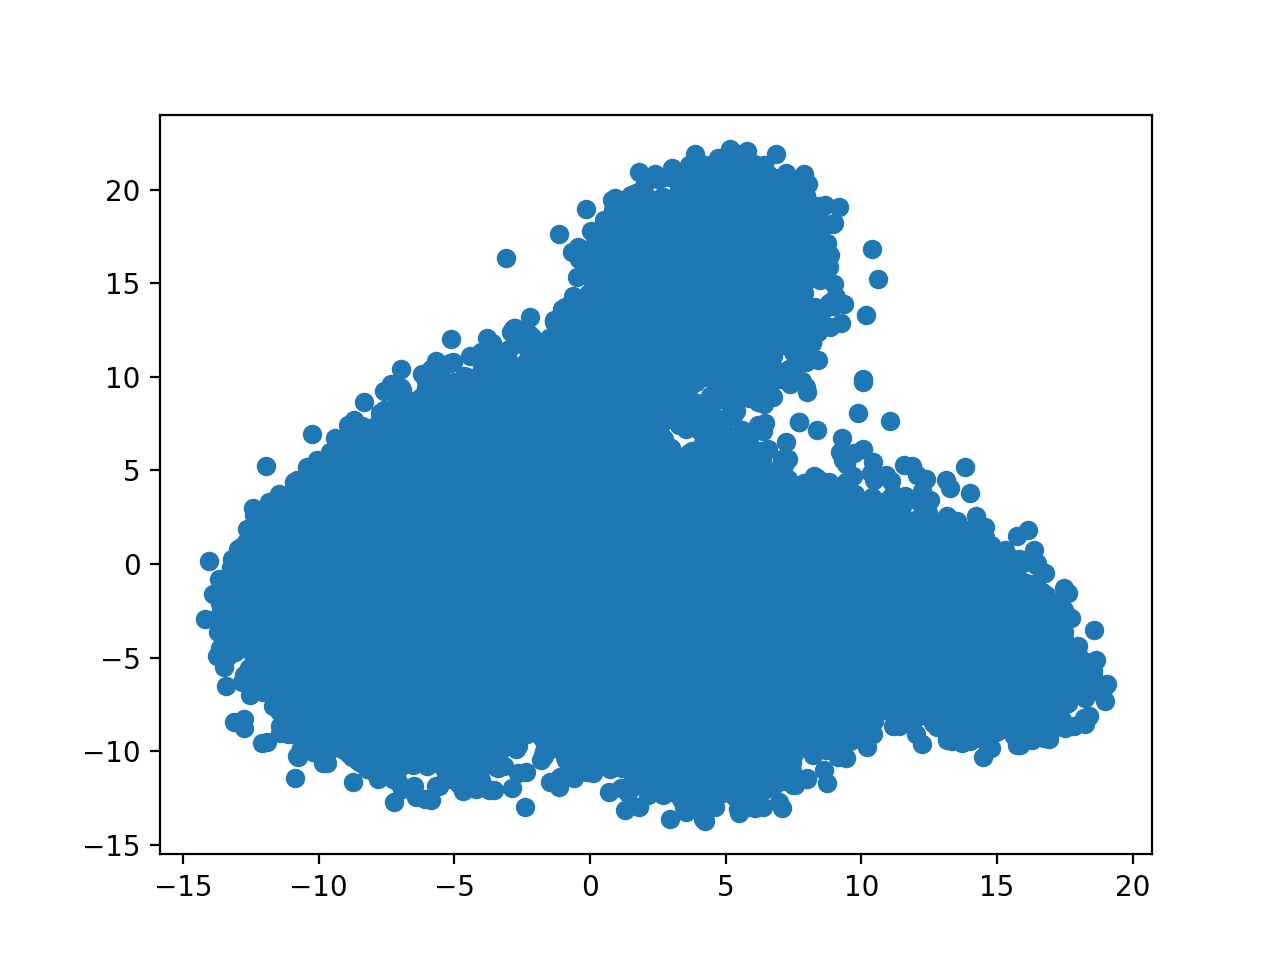

In [63]:

from sklearn.decomposition import PCA

doc_vectors = np.vstack([word.vector for word in doc if word.has_vector])
type(doc_vectors)
doc_vectors.shape
pca = PCA(n_components=2)
doc_vecs_transformed = pca.fit_transform(doc_vectors)
print(doc_vecs_transformed)
# result = np.c_[text.split(), doc_vecs_transformed]
result = doc_vecs_transformed
%matplotlib notebook
print("Plotting")
from matplotlib import pyplot
pyplot.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
# for i, word in enumerate(words):
# 	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
# # from gensim.models import Word2Vec

# # train model
# print("Training the model")
# model = Word2Vec(text_sentences2, min_count=1)

# from sklearn.decomposition import PCA
# X = model[model.wv.vocab]
# pca = PCA(n_components=3)
# result = pca.fit_transform(X)

# create a scatter plot of the projection
# %matplotlib notebook
# print("Plotting")
# from matplotlib import pyplot
# pyplot.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
# for i, word in enumerate(words):
# 	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
# pyplot.show()


In [33]:
import re

# Create one big line and deform (normalize)

# text_bigline = text_bigline.lower()
# print(text_bigline)
# text_bigline = re.sub(r'-+', ' ', text_bigline)
# text_bigline = re.sub(r'â€”+', ' ', text_bigline)
# text_bigline = re.sub(r'_+', ' ', text_bigline)
# text_bigline = re.sub(r'"+', ' ', text_bigline)
# #text_bigline = re.sub(r"'+", ' ', text_bigline)
# text_bigline = re.sub(r',+', ' ', text_bigline)
# #text_bigline = re.sub(r'â€™', ' ', text_bigline)
# text_bigline = re.sub(r'[â€œâ€]', ' ', text_bigline)
# text_bigline = re.sub(r'\s+', ' ', text_bigline)

# Get some stopwords
stops = set()
for stop in open('stopwords.txt').readlines():
    stops.add(stop.strip())

# Split into sentences
text_sentences = re.split(r'[.;?!:]', text)   
print(text_sentences)
text_sentences2 = []
for sentence in text_sentences:
    words = sentence.split()
    words_sans = set(words) - stops
    text_sentences2.append(list(words_sans))
    
# Remove emptys
for i, sentence in enumerate(text_sentences2):
    if len(sentence) < 3:
        del(text_sentences2[i])
        
from gensim.models import Word2Vec

# train model
print("Training the model")
model = Word2Vec(text_sentences2, min_count=1)

# fit a 2d PCA model to the vectors
print("PCA time")
from sklearn.decomposition import PCA
X = model[model.wv.vocab]
pca = PCA(n_components=3)
result = pca.fit_transform(X)

# create a scatter plot of the projection
%matplotlib notebook
print("Plotting")
from matplotlib import pyplot
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# plot_url = py.plot_mpl(alpha, filename="mpl-scatter")

[' ARAB\nAsia 1,52\nOBSERVER\nPrice in U', 'A', 'R', '\nP', 'T', ' 10\n|THE NON-ALIGNED WEEKLY\nNo', ' 180 – December 2, 1963\nUNIVERSITY\nUPPER EGYPT HOTELS\nOFFER AIR - CONDITIONED, COMFORT, LUXURY & RELAXATIO\nAT LUXOR\nWINTER PALACE & THE NEW WINTER PALACE\nLUXOR HOTEL - SAVOY HOTEL\nAT ASWAN\nCATARACT & THE NEW CATARACT\nGRAND HOTEL\nWELCOME YOU\non your visit to the Temples of Philae om\nABU SIMBEL from Luxor to the stupen\nruins of « THEBES and the KARNAK VALE\nSoon ', '', '', ' the CATARACT chain of hotels', '', '', ' all ove\nof the KINGS»', '\nhotels', '', '', ' all over Egypt\nHIS LAST POLITICAL ACT', ' SUPPORT FOR THE REFUGEES\n   for\nwhole\nweek\n$\nEGYPT\nONLI\n* Smith\nSYDNEY\nBOEING ', '\nVIA PERTH\nEVERY MONDAY\nYou can see more in Egypt\nin one week than anywherW\nelse in ten\nDIRECT FLIGHT-CONVENIENT DEPARTURE / ARRIVAL TIMINGS\nEXPERIENCED CREW - INDIAN HOSPITALITY\nAIR INDIA\nin association with B', 'O', 'A', 'C', ' and QANTAS\nCairo, the least expensive Capital i

Plotting


/Users/zgl3n/.local/share/virtualenvs/data-analysis-GZuBTKDw/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


<IPython.core.display.Javascript object>